Supervised Learning Capstone: Unit 3  
Kevin Hahn



<a href='#Setup'>1. Setup & Importing required packages</a>  
<a href='#EDA'>2. Exploratory Data Analysis</a>  
<a href='#More EDA'>3. Further Exploration and Data Cleansing</a>  
<a href='#Features'>4. Feature Creation and Data Coding</a>  
<a href='#Initial Model'>5. Initial Model</a>  
<a href='#Revised Initial'>6. Revised Initial Model</a>  
<a href='#Classifiers'>7. Exploring Classifier Methods</a>  
<a href='#Feature Reduction'>8. Feature Reduction</a>  
<a href='#Hyper'>9. Adventures in Hyperparamter Optimization</a>  
<a href='#Boosting'>10. Boosting Models</a>  
<a href='#Final'>11. Final Model: Comparison and Test-Train Spotcheck</a>  
<a href='#Appendix'>Appendix: Dataset Info; Additional Charts and Methods Attempted</a>

<a id='Setup'></a>

In [255]:
##Import All Required Packages

#The Basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Decision Tree Classifier
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz

#Random Forest Classifier
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

#Naive Bayes Classifier
from sklearn.naive_bayes import BernoulliNB

#Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

#SVM Classifier
from sklearn.svm import SVC

#Compare Algorithms
from pandas import read_csv
from matplotlib import pyplot # delete??
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

#AdaBoost Classification
from sklearn.ensemble import AdaBoostClassifier

#Stochastic Gradient Boosting Classification
from sklearn.ensemble import GradientBoostingClassifier

#Voting Ensemble for Classification
from sklearn.ensemble import VotingClassifier

#Grid Search for Algorithm Tuning
from sklearn.model_selection import GridSearchCV

#Randomized for Algorithm Tuning
import numpy
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

#Confusion Matrix and Accuracy Report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [256]:
##Import Data File

filepath = ("https://raw.githubusercontent.com/KevinHahnMTBC/Mental-Health-and-Tech/master/Survey.csv")
survey = pd.read_csv(filepath)

#(Original survey items are at the end of this notebook)

In [257]:
survey.columns = ['Timestamp',
 'Age',
 'Gender',
 'Country',
 'state',
 'self_employed',
 'family_history',
 'treatment',
 'work_interfere',
 'no_employees',
 'remote_work',
 'tech_company',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence',
 'comments']

<a id='EDA'></a>

In [258]:
##Exploratory Data Analysis

#First twenty observations
survey.head(20)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,8/27/2014 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,8/27/2014 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,8/27/2014 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,8/27/2014 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,8/27/2014 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,8/27/2014 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,8/27/2014 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,8/27/2014 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,8/27/2014 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,8/27/2014 11:32:44,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


In [259]:
#Dimensions of dataset
survey.shape

(1259, 27)

In [260]:
#Data types
survey.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [261]:
#Correlations of variables
survey.corr(method='pearson')

##(nothing to correlate)

,Age
Age,1.0000


In [262]:
#Class sizes for desired outcome variable
survey.groupby(['treatment']).size()

treatment
No     622
Yes    637
dtype: int64

In [263]:
### Exploring each of the variables as-is, before data cleansing

In [264]:
#Age

print(survey['Age'].unique())
print(survey['Age'].value_counts())
print(len(survey['Age']))

survey.describe(percentiles=[0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.98, 0.99])

## (need to ditch of replace ages -1726, -29, -1, 5, 8, 11, 329, 99999999999 


[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]
 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 39             33
 40             33
 43         

,Age
count,1259.0000
mean,79428148.3114
std,2818299442.9820
min,-1726.0000
10%,24.0000
25%,27.0000
50%,31.0000
75%,36.0000
90%,42.0000
95%,45.0000


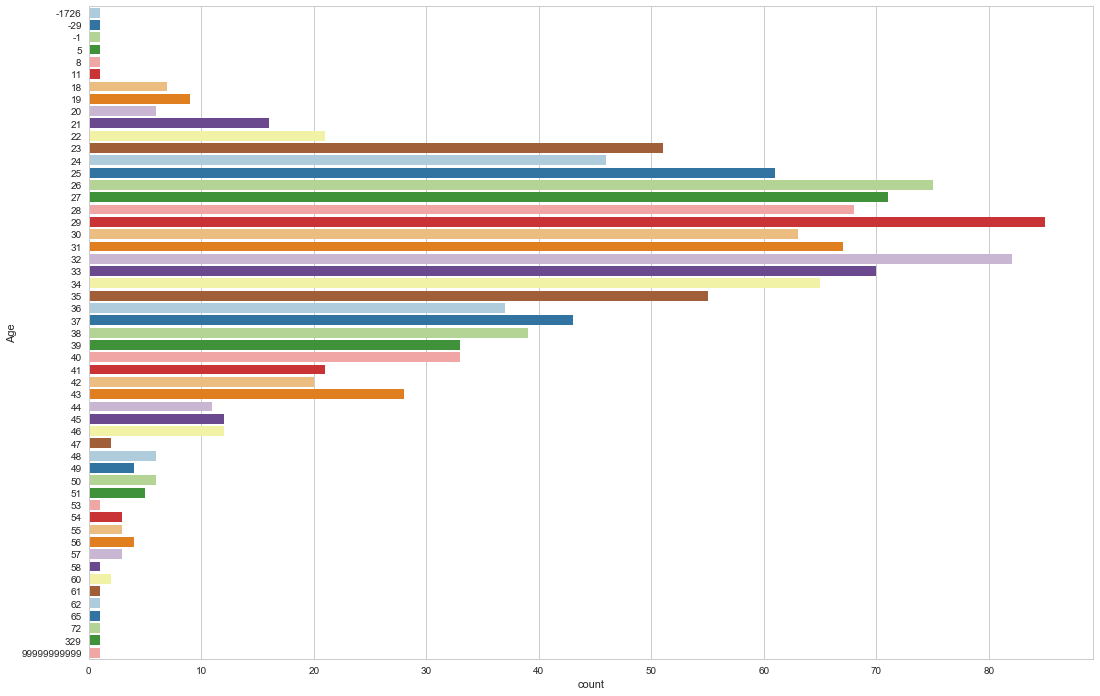

In [265]:
f, ax = plt.subplots(figsize=(18, 12))
sns.countplot(y="Age", palette="Paired", data=survey)

pd.options.display.float_format = '{:.0f}'.format

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']
Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make      

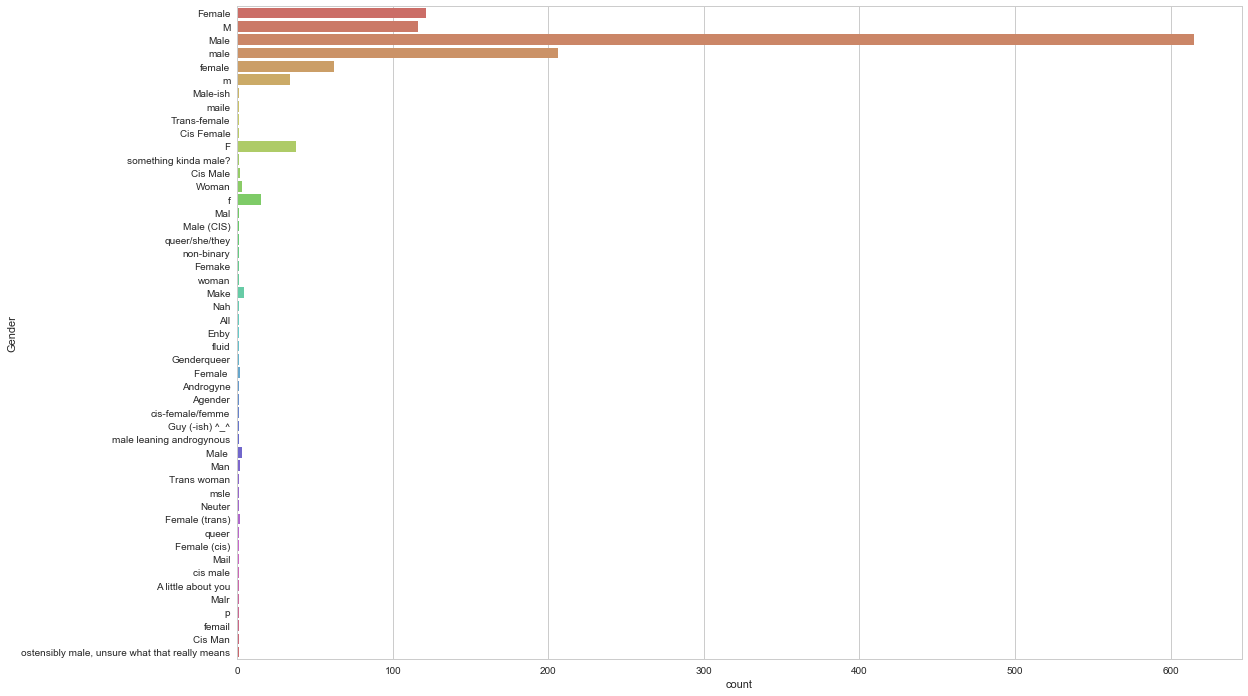

In [266]:
#Gender 

print(survey['Gender'].unique())
print(survey['Gender'].value_counts())
print(len(survey['Gender']))

f, ax = plt.subplots(figsize=(18, 12))
sns.countplot(y="Gender", palette="hls", data=survey, color="c")

## (considerable diversity in gender, free response item)

['United States' 'Canada' 'United Kingdom' 'Bulgaria' 'France' 'Portugal'
 'Netherlands' 'Switzerland' 'Poland' 'Australia' 'Germany' 'Russia'
 'Mexico' 'Brazil' 'Slovenia' 'Costa Rica' 'Austria' 'Ireland' 'India'
 'South Africa' 'Italy' 'Sweden' 'Colombia' 'Latvia' 'Romania' 'Belgium'
 'New Zealand' 'Zimbabwe' 'Spain' 'Finland' 'Uruguay' 'Israel'
 'Bosnia and Herzegovina' 'Hungary' 'Singapore' 'Japan' 'Nigeria' 'Croatia'
 'Norway' 'Thailand' 'Denmark' 'Bahamas, The' 'Greece' 'Moldova' 'Georgia'
 'China' 'Czech Republic' 'Philippines']
United States             751
United Kingdom            185
Canada                     72
Germany                    45
Netherlands                27
Ireland                    27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium 

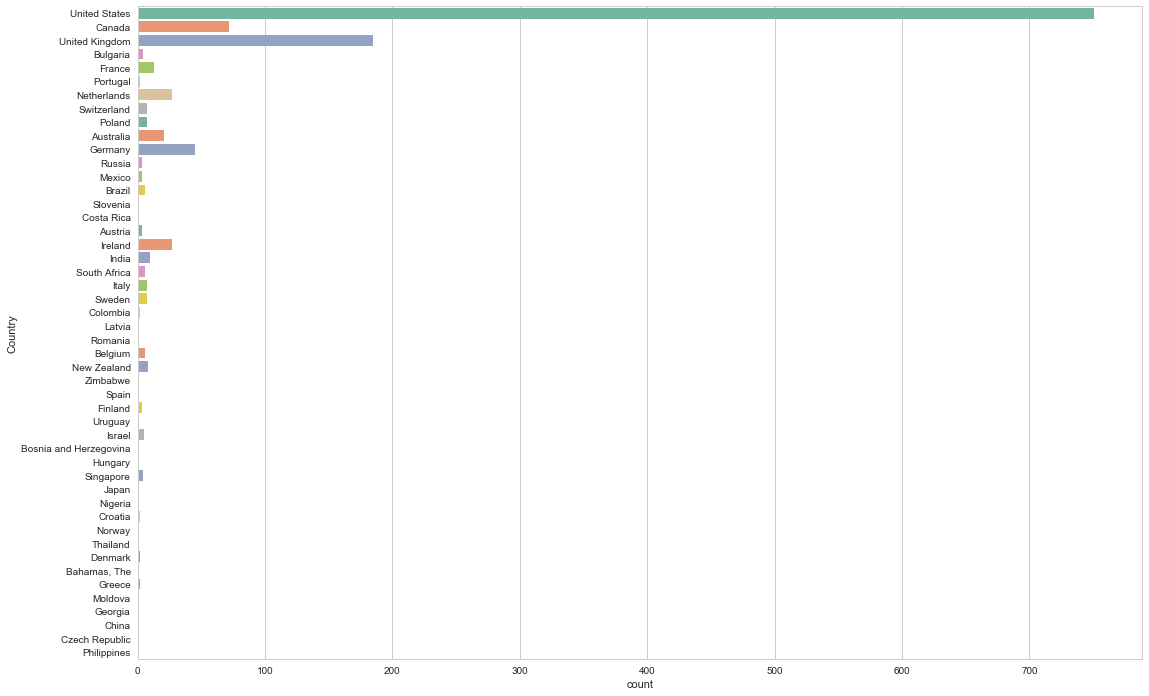

In [267]:
#Country 
print(survey['Country'].unique())
print(survey['Country'].value_counts())
print(len(survey['Country']))

f, ax = plt.subplots(figsize=(18, 12))
sns.countplot(y="Country", palette="Set2", data=survey)

['IL' 'IN' nan 'TX' 'TN' 'MI' 'OH' 'CA' 'CT' 'MD' 'NY' 'NC' 'MA' 'IA' 'PA'
 'WA' 'WI' 'UT' 'NM' 'OR' 'FL' 'MN' 'MO' 'AZ' 'CO' 'GA' 'DC' 'NE' 'WV' 'OK'
 'KS' 'VA' 'NH' 'KY' 'AL' 'NV' 'NJ' 'SC' 'VT' 'SD' 'ID' 'MS' 'RI' 'WY' 'LA'
 'ME']
CA    138
WA     70
NY     57
TN     45
TX     44
OH     30
OR     29
PA     29
IL     29
IN     27
MI     22
MN     21
MA     20
FL     15
VA     14
NC     14
MO     12
WI     12
GA     12
UT     11
CO      9
MD      8
AL      8
AZ      7
NJ      6
OK      6
SC      5
KY      5
CT      4
DC      4
IA      4
KS      3
NH      3
VT      3
SD      3
NV      3
WY      2
NE      2
NM      2
WV      1
ME      1
ID      1
MS      1
RI      1
LA      1
Name: state, dtype: int64
1259


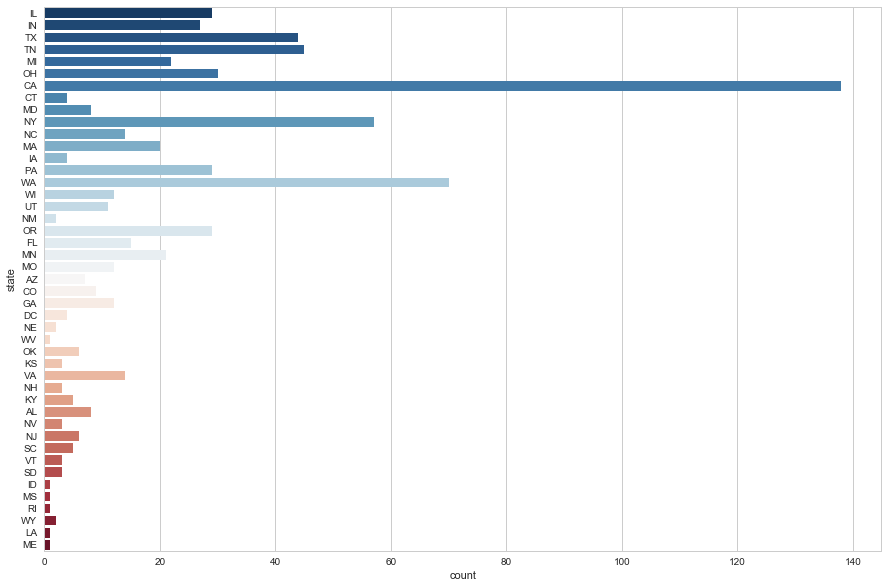

In [268]:
#State 
## Contains NaNs !!! 
print(survey['state'].unique())
print(survey['state'].value_counts())
print(len(survey['state']))

f, ax = plt.subplots(figsize=(15, 10))
sns.set_style("darkgrid")
sns.countplot(y="state", palette="RdBu_r", data=survey)

[nan 'Yes' 'No']
No     1095
Yes     146
Name: self_employed, dtype: int64
1259


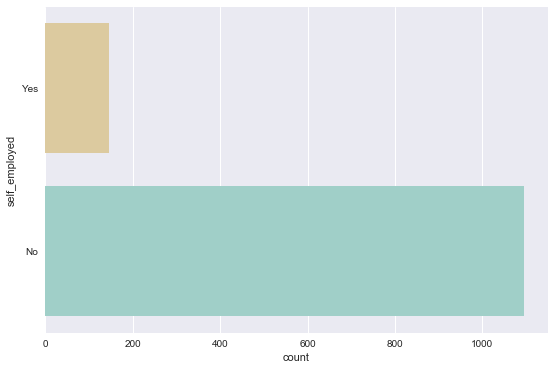

In [269]:
#self-employed 
## Contains 18 NaNs !!! 

print(survey['self_employed'].unique())
print(survey['self_employed'].value_counts())
print(len(survey['self_employed']))

f, ax = plt.subplots(figsize=(9, 6))
sns.set_style("darkgrid")
sns.countplot(y="self_employed", palette="BrBG", data=survey)

['No' 'Yes']
No     767
Yes    492
Name: family_history, dtype: int64
1259


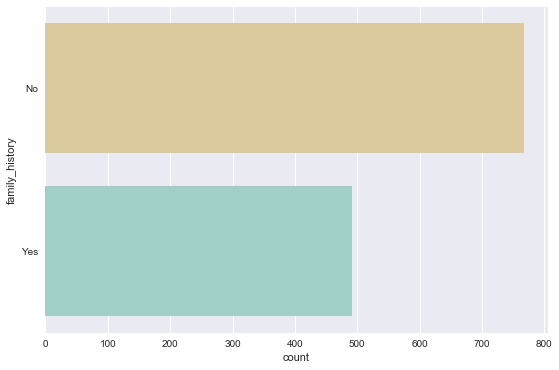

In [270]:
#family_history

print(survey['family_history'].unique())
print(survey['family_history'].value_counts())
print(len(survey['family_history']))

f, ax = plt.subplots(figsize=(9, 6))
sns.set_style("darkgrid")
sns.countplot(y="family_history", palette="BrBG", data=survey)

['Yes' 'No']
Yes    637
No     622
Name: treatment, dtype: int64
1259


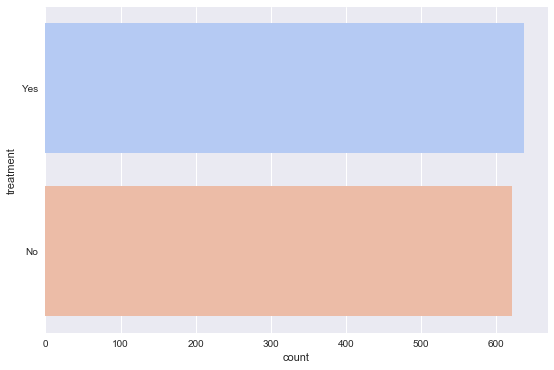

In [271]:
#treatment
#desired outcome variable

print(survey['treatment'].unique())
print(survey['treatment'].value_counts())
print(len(survey['treatment']))

f, ax = plt.subplots(figsize=(9, 6))
sns.set_style("darkgrid")
sns.countplot(y="treatment", palette="coolwarm", data=survey)

['Often' 'Rarely' 'Never' 'Sometimes' nan]
Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64
1259
264


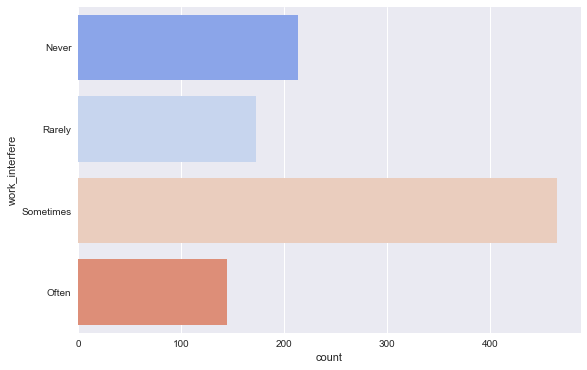

In [272]:
#work_interfere
#Never --> Rarely --> Sometimes --> Often
##Contains 264 (21%) NaNs!!!! ##

print(survey['work_interfere'].unique())
print(survey['work_interfere'].value_counts())
print(len(survey['work_interfere']))

# Number of NANs in work_interfere
print(len(survey) - len(survey.work_interfere.dropna()))

f, ax = plt.subplots(figsize=(9, 6))
sns.set_style("darkgrid")
sns.countplot(y="work_interfere", order=['Never', 'Rarely', 'Sometimes', 'Often'], palette="coolwarm", data=survey)

## Note:

## Original item reads: If you have a mental health condition, do you feel that it interferes with your work? 

## is NaN supposed to be the midpoint (e.g., neither interfers nor does not interfere, 
## more than rarely and less than sometimes)?? almost 21% of data missing on this item alone
## alternatively, up to 79% identify as having mental health condition? seems high, or does condition mean
## *diagnosed* mental illness or just perceived/self-reported mental health symptoms/condition/illness? 

['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000']
6-25              290
26-100            289
More than 1000    282
100-500           176
1-5               162
500-1000           60
Name: no_employees, dtype: int64
1259


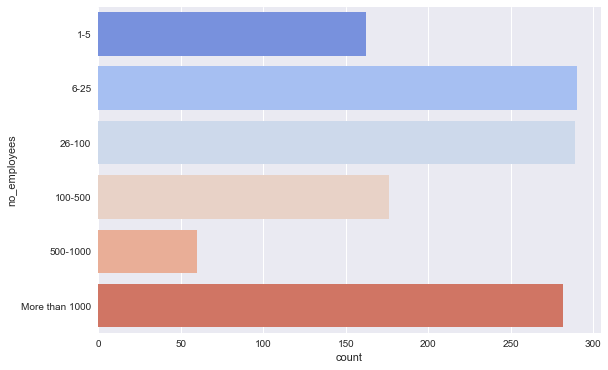

In [273]:
#no_employees
#1-5 --> 6-25 --> 26-100 --> 100-500 --> 500-1000 --> More than 1000

print(survey['no_employees'].unique())
print(survey['no_employees'].value_counts())
print(len(survey['no_employees']))

f, ax = plt.subplots(figsize=(9, 6))
sns.set_style("darkgrid")
sns.countplot(y="no_employees", order=["1-5", "6-25", "26-100", "100-500", "500-1000", "More than 1000"],
              palette="coolwarm", data=survey)

['No' 'Yes']
No     883
Yes    376
Name: remote_work, dtype: int64
1259


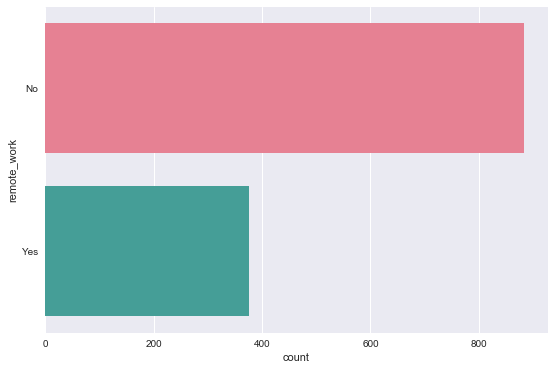

In [274]:
#remote work

print(survey['remote_work'].unique())
print(survey['remote_work'].value_counts())
print(len(survey['remote_work']))

f, ax = plt.subplots(figsize=(9, 6))
sns.set_style("darkgrid")
sns.countplot(y="remote_work", 
              palette="husl", order = ['No', 'Yes'], data=survey)

['Yes' 'No']
Yes    1031
No      228
Name: tech_company, dtype: int64
1259


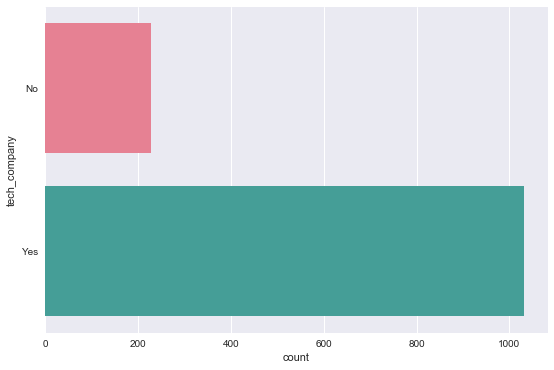

In [275]:
#tech company

print(survey['tech_company'].unique())
print(survey['tech_company'].value_counts())
print(len(survey['tech_company']))

f, ax = plt.subplots(figsize=(9, 6))
sns.set_style("darkgrid")
sns.countplot(y="tech_company", 
              palette="husl", order = ['No', 'Yes'], data=survey)

['Yes' "Don't know" 'No']
Yes           477
Don't know    408
No            374
Name: benefits, dtype: int64
1259


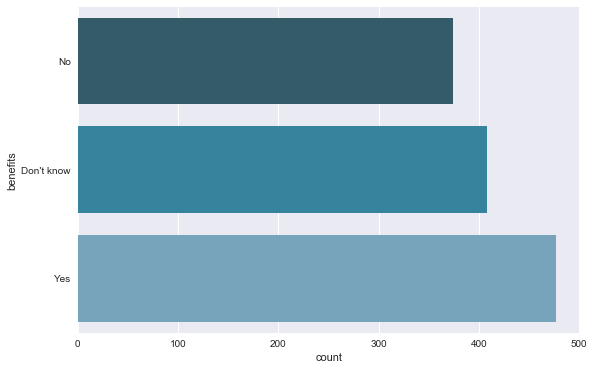

In [276]:
#benefits

print(survey['benefits'].unique())
print(survey['benefits'].value_counts())
print(len(survey['benefits']))

f, ax = plt.subplots(figsize=(9, 6))
sns.set_style("darkgrid")
sns.countplot(y="benefits", 
              palette="PuBuGn_d", order = ['No', "Don't know", 'Yes'], data=survey)

['Not sure' 'No' 'Yes']
No          501
Yes         444
Not sure    314
Name: care_options, dtype: int64
1259


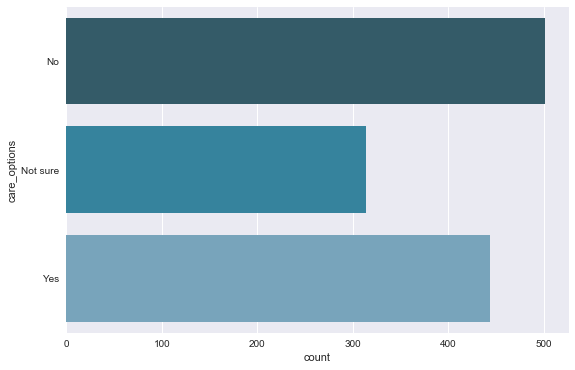

In [277]:
#care_options

print(survey['care_options'].unique())
print(survey['care_options'].value_counts())
print(len(survey['care_options']))

f, ax = plt.subplots(figsize=(9, 6))
sns.set_style("darkgrid")
sns.countplot(y="care_options", 
              palette="PuBuGn_d", order = ['No', 'Not sure', 'Yes'], data=survey)

['No' "Don't know" 'Yes']
No            842
Yes           229
Don't know    188
Name: wellness_program, dtype: int64
1259


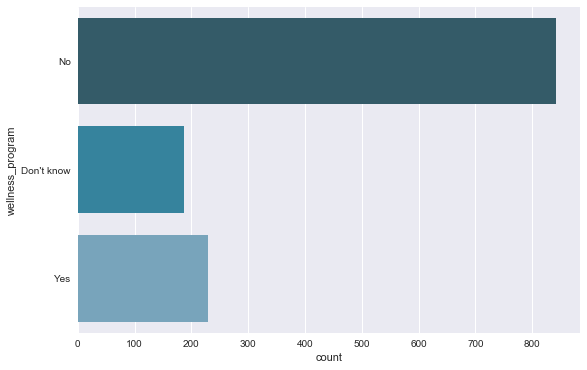

In [278]:
#wellness_program

print(survey['wellness_program'].unique())
print(survey['wellness_program'].value_counts())
print(len(survey['wellness_program']))

f, ax = plt.subplots(figsize=(9, 6))
sns.set_style("darkgrid")
sns.countplot(y="wellness_program", 
              palette="PuBuGn_d", order = ['No', "Don't know", 'Yes'], data=survey)

['Yes' "Don't know" 'No']
No            646
Don't know    363
Yes           250
Name: seek_help, dtype: int64
1259


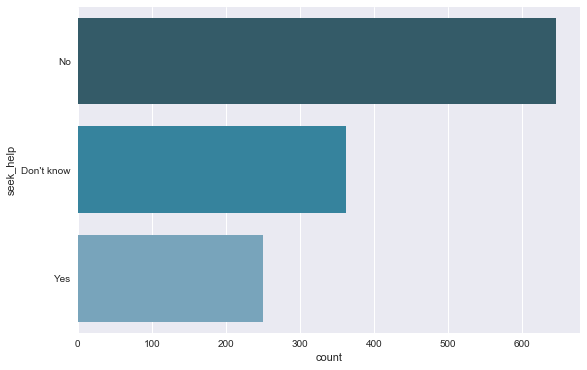

In [279]:
#seek_help

print(survey['seek_help'].unique())
print(survey['seek_help'].value_counts())
print(len(survey['seek_help']))

f, ax = plt.subplots(figsize=(9, 6))
sns.set_style("darkgrid")
sns.countplot(y="seek_help", 
              palette="PuBuGn_d", order = ['No', "Don't know", 'Yes'], data=survey)

['Yes' "Don't know" 'No']
Don't know    819
Yes           375
No             65
Name: anonymity, dtype: int64
1259


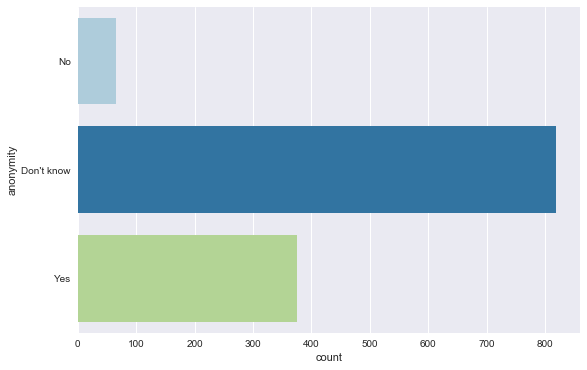

In [280]:
#anonymity

print(survey['anonymity'].unique())
print(survey['anonymity'].value_counts())
print(len(survey['anonymity']))

f, ax = plt.subplots(figsize=(9, 6))
sns.set_style("darkgrid")
sns.countplot(y="anonymity", 
              palette="Paired", order = ['No', "Don't know", 'Yes'], data=survey)

['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy']
Don't know            563
Somewhat easy         266
Very easy             206
Somewhat difficult    126
Very difficult         98
Name: leave, dtype: int64
1259


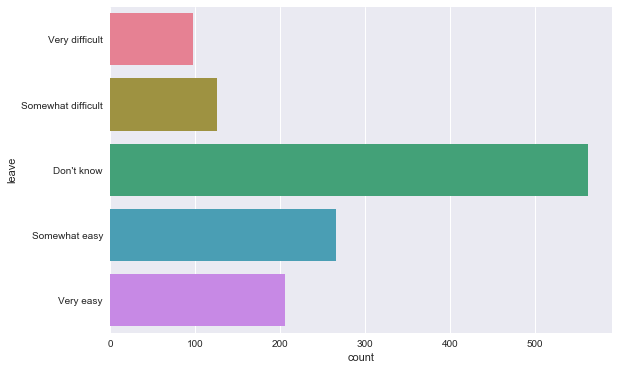

In [281]:
#leave
# Very difficult --> Somewhat difficult --> Don't know --> Somewhat easy --> Very easy

#### HYPOTHESIZING DONT KNOW AS MIDPOINT OF SCALE
print(survey['leave'].unique())
print(survey['leave'].value_counts())
print(len(survey['leave']))

f, ax = plt.subplots(figsize=(9, 6))
sns.set_style("darkgrid")
sns.countplot(y="leave", 
              palette="husl", order = ['Very difficult', 'Somewhat difficult', 
                                           "Don't know", 'Somewhat easy', 'Very easy'],
              data=survey)

['No' 'Maybe' 'Yes']
No       490
Maybe    477
Yes      292
Name: mental_health_consequence, dtype: int64
1259


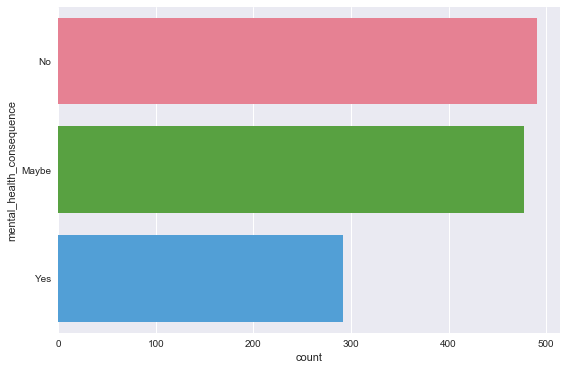

In [282]:
#mental_health_consequence

print(survey['mental_health_consequence'].unique())
print(survey['mental_health_consequence'].value_counts())
print(len(survey['mental_health_consequence']))

f, ax = plt.subplots(figsize=(9, 6))
sns.set_style("darkgrid")
sns.countplot(y="mental_health_consequence", 
              palette="husl", order = ['No', 'Maybe', 'Yes'],
              data=survey)

['No' 'Yes' 'Maybe']
No       925
Maybe    273
Yes       61
Name: phys_health_consequence, dtype: int64
1259


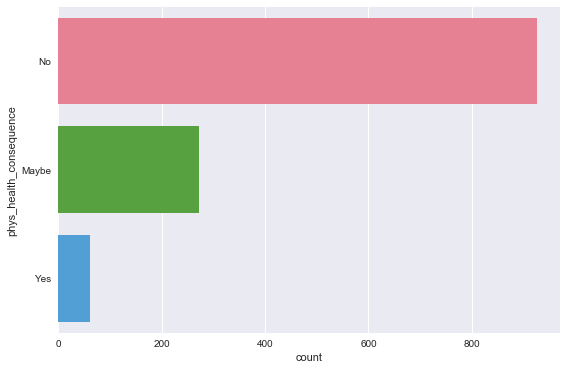

In [283]:
#phys_health_consequence

print(survey['phys_health_consequence'].unique())
print(survey['phys_health_consequence'].value_counts())
print(len(survey['phys_health_consequence']))

f, ax = plt.subplots(figsize=(9, 6))
sns.set_style("darkgrid")
sns.countplot(y="phys_health_consequence", 
              palette="husl", order = ['No', 'Maybe', 'Yes'],
              data=survey)

['Some of them' 'No' 'Yes']
Some of them    774
No              260
Yes             225
Name: coworkers, dtype: int64
1259


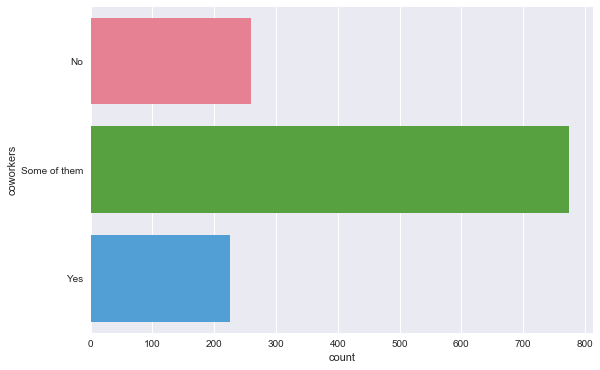

In [284]:
#coworkers

print(survey['coworkers'].unique())
print(survey['coworkers'].value_counts())
print(len(survey['coworkers']))

f, ax = plt.subplots(figsize=(9, 6))
sns.set_style("darkgrid")
sns.countplot(y="coworkers", 
              palette="husl", order = ['No', 'Some of them', 'Yes'],
              data=survey)

['Yes' 'No' 'Some of them']
Yes             516
No              393
Some of them    350
Name: supervisor, dtype: int64
1259


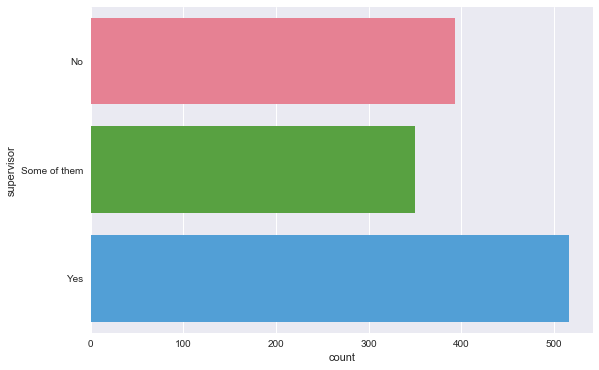

In [285]:
#supervisor

print(survey['supervisor'].unique())
print(survey['supervisor'].value_counts())
print(len(survey['supervisor']))

f, ax = plt.subplots(figsize=(9, 6))
sns.set_style("darkgrid")
sns.countplot(y="supervisor", 
              palette="husl", order = ['No', 'Some of them', 'Yes'],
              data=survey)

['No' 'Yes' 'Maybe']
No       1008
Maybe     207
Yes        44
Name: mental_health_interview, dtype: int64
1259


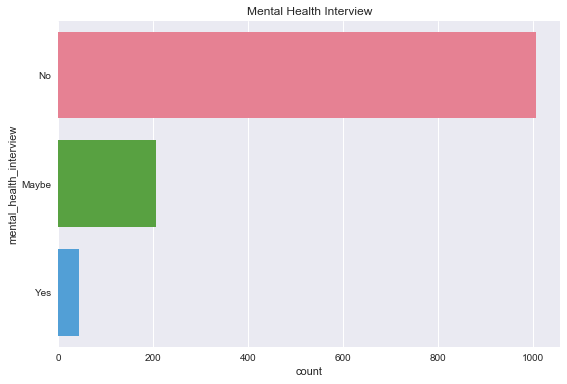

In [286]:
#mental_health_interview

print(survey['mental_health_interview'].unique())
print(survey['mental_health_interview'].value_counts())
print(len(survey['mental_health_interview']))

f, ax = plt.subplots(figsize=(9, 6))
sns.set_style("darkgrid")
sns.countplot(y="mental_health_interview", 
              palette="husl", order = ['No', 'Maybe', 'Yes'],
              data=survey)
ax.set_title("Mental Health Interview")

['Maybe' 'No' 'Yes']
Maybe    557
No       500
Yes      202
Name: phys_health_interview, dtype: int64
1259


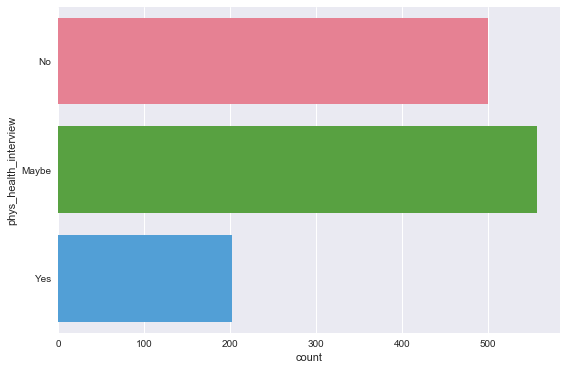

In [287]:
#phys_health_interview

print(survey['phys_health_interview'].unique())
print(survey['phys_health_interview'].value_counts())
print(len(survey['phys_health_interview']))

f, ax = plt.subplots(figsize=(9, 6))
sns.set_style("darkgrid")
sns.countplot(y="phys_health_interview", 
              palette="husl", order = ['No', 'Maybe', 'Yes'],
              data=survey)

['Yes' "Don't know" 'No']
Don't know    576
Yes           343
No            340
Name: mental_vs_physical, dtype: int64
1259


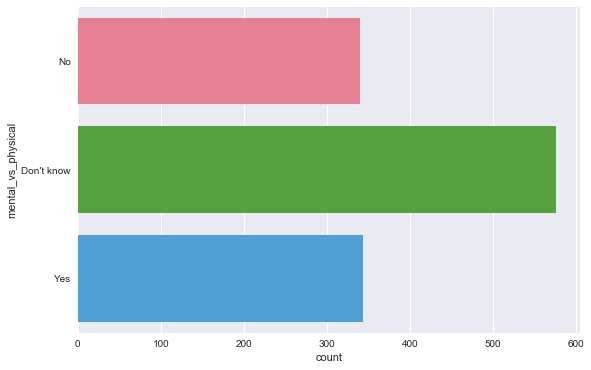

In [288]:
#mental_vs_physical

print(survey['mental_vs_physical'].unique())
print(survey['mental_vs_physical'].value_counts())
print(len(survey['mental_vs_physical']))

f, ax = plt.subplots(figsize=(9, 6))
sns.set_style("darkgrid")
sns.countplot(y="mental_vs_physical", 
              palette="husl", order = ['No', "Don't know", 'Yes'],
              data=survey)

['No' 'Yes']
No     1075
Yes     184
Name: obs_consequence, dtype: int64
1259


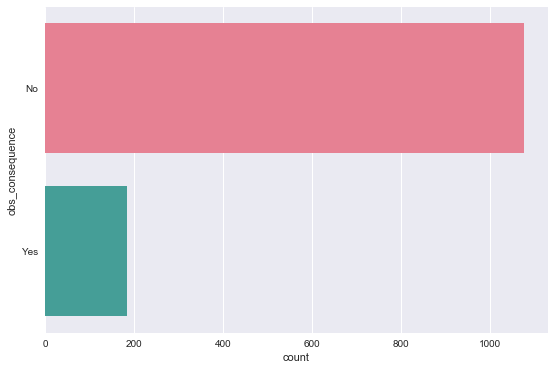

In [289]:
#obs_consequence

print(survey['obs_consequence'].unique())
print(survey['obs_consequence'].value_counts())
print(len(survey['obs_consequence']))

f, ax = plt.subplots(figsize=(9, 6))
sns.set_style("darkgrid")
sns.countplot(y="obs_consequence", 
              palette="husl", order = ['No', 'Yes'],
              data=survey)

In [290]:
#comments

print(survey['comments'].unique())
print(len(survey['comments']))

[nan
 'I\'m not on my company\'s health insurance, which could be part of the reason I answered "Don\'t know" to so many questions.'
 'I have chronic, low-level neurological issues that have mental health side effects. One of my supervisors has also experienced similar neurological problems so I feel more comfortable being open about my issues than I would with someone without that experience. '
 "My company does provide healthcare, but not to me as I'm on a fixed-term contract. The mental healthcare I use is provided entirely outside of my work."
 'Relatively new job. Ask again later'
 'Sometimes I think  about using drugs for my mental health issues. If i use drugs, I feel better'
 'I selected my current employer based on its policies about self care and the quality of their overall health and wellness benefits. I still have residual caution from previous employers, who ranged from ambivalent to indifferent to actively hostile regarding mental health concerns.'
 "Our health plan has 

In [291]:
#Total number of comments
len(survey.comments.dropna())

164

<a id='More EDA'></a>

In [292]:
##Exploring raw variables/features a bit further and performing some basic data cleansing

In [293]:
## Current age range has some awkward outliers

pd.options.display.float_format = '{:.0f}'.format

survey.describe(percentiles=[0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.98, 0.99])

# (That standard deviation is ridiculous!!)

,Age
count,1259
mean,79428148
std,2818299443
min,-1726
10%,24
25%,27
50%,31
75%,36
90%,42
95%,45


In [294]:
# after fixing "questionable" Ages :3

survey.Age = survey.Age

survey.Age = survey.Age.apply(lambda x: np.nan if x == -1726 else x)
survey.Age = survey.Age.apply(lambda x: np.nan if x == -29 else x)
survey.Age = survey.Age.apply(lambda x: np.nan if x == -1 else x)
survey.Age = survey.Age.apply(lambda x: np.nan if x == 5 else x)
survey.Age = survey.Age.apply(lambda x: np.nan if x == 8 else x)
survey.Age = survey.Age.apply(lambda x: np.nan if x == 11 else x)
survey.Age = survey.Age.apply(lambda x: np.nan if x == 329 else x)
survey.Age = survey.Age.apply(lambda x: np.nan if x == 99999999999 else x)

survey.Age.describe(percentiles=[0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.98, 0.99])

#Looks more reasonable, lose 8 observations
#Young crowd!!

count   1251
mean      32
std        7
min       18
10%       24
25%       27
50%       31
75%       36
90%       42
95%       45
98%       51
99%       56
max       72
Name: Age, dtype: float64

In [295]:
#Some people from outside United States still reported a US State...
print(survey['state'][survey['Country'] != 'United States'].unique())
print('')

#Four respondents reported a US State AND that they were not from the US
print(survey['state'][survey['Country'] != 'United States'].value_counts())
print('')

#What rows said they were from another country but also reported a US state?
print(survey['Country'][survey['Country'] != 'United States'][survey['state'] == 'IL'])
print(survey['Country'][survey['Country'] != 'United States'][survey['state'] == 'MD'])
print(survey['Country'][survey['Country'] != 'United States'][survey['state'] == 'NY'])
print(survey['Country'][survey['Country'] != 'United States'][survey['state'] == 'UT'])

[nan 'NY' 'MD' 'IL' 'UT']

NY    1
UT    1
IL    1
MD    1
Name: state, dtype: int64

989    Bahamas, The
Name: Country, dtype: object
488    Israel
Name: Country, dtype: object
319    Latvia
Name: Country, dtype: object
1179    Bulgaria
Name: Country, dtype: object


In [296]:
#...and some from within the United States selected no state.
print(survey['state'][survey['Country'] == 'United States'].unique())

#Replacing the 11 NaNs with a dummy value
survey.state = survey.state.fillna("-1")

#Identifying rows of participants 
print(len(survey[survey['state'] == "-1"][survey['Country'] == 'United States']))
print(survey[survey['state'] == "-1"][survey['Country'] == 'United States'])

#Transforming the dummy values back to NaNs
survey.state = survey.state.apply(lambda x: np.nan if x == "-1" else x)

['IL' 'IN' 'TX' 'TN' 'MI' 'OH' 'CA' 'CT' 'MD' 'NY' 'NC' 'MA' 'IA' 'PA' 'WA'
 'WI' 'UT' nan 'NM' 'OR' 'FL' 'MN' 'MO' 'AZ' 'CO' 'GA' 'DC' 'NE' 'WV' 'OK'
 'KS' 'VA' 'NH' 'KY' 'AL' 'NV' 'NJ' 'SC' 'VT' 'SD' 'ID' 'MS' 'RI' 'WY' 'LA'
 'ME']
11
               Timestamp  Age  Gender        Country state self_employed  \
52    8/27/2014 11:45:34   31       M  United States    -1            No   
294   8/27/2014 14:15:58   56    Male  United States    -1            No   
367   8/27/2014 15:13:34   36    Male  United States    -1            No   
525   8/27/2014 17:32:05   41  Female  United States    -1            No   
574   8/27/2014 20:52:21   50    Male  United States    -1            No   
596   8/27/2014 22:14:24   24  Female  United States    -1            No   
638    8/28/2014 3:13:10   35    Male  United States    -1           Yes   
817   8/28/2014 14:41:48   44    male  United States    -1           Yes   
854   8/28/2014 17:01:07   31    Male  United States    -1            No   
926

/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<a id='Features'></a>

In [298]:
##Feature creation

#US resident? if so, 1
survey['US'] = survey.Country
survey['US'] = survey['US'].apply(lambda x: 1 if x == 'United States' else 0)

#Age as federally protected class (age 40 and over)? if so, 1
survey['age_class'] = survey.Age
survey['age_class'] = survey['age_class'].apply(lambda x: 1 if x >= 40 else 0)

In [299]:
## Copying variables of interest so NAs can be dropped and data can be split into X and y 
survey_drop = survey[[
 'treatment',
 'Age',
 'family_history',
 'work_interfere',
 'no_employees',
 'remote_work',
 'tech_company',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence',
 'US',
 'age_class']].copy()

#Dropping NaNs with this feature set
survey_drop = survey_drop.dropna()

len(survey_drop)

989

In [300]:
#Splitting into X (predictors) and Y (outcome)

#X
predictors = survey_drop[['family_history',
 'Age', # cleaned
 'work_interfere',
 'no_employees',
 'remote_work',
 'tech_company',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence',
 'US',
 'age_class']]

#Y
outcome = survey_drop['treatment']

In [301]:
# Coding other variables

predictors.family_history = predictors.family_history.apply(lambda x: 1 if x == "Yes" else 0)

predictors.work_interfere = predictors.work_interfere.apply(lambda x: 0 if x == "Never" else x)
predictors.work_interfere = predictors.work_interfere.apply(lambda x: 1 if x == "Rarely" else x)
# predictors.work_interfere = predictors.work_interfere.fillna(2) #newp, this item is kinda funky...
predictors.work_interfere = predictors.work_interfere.apply(lambda x: 2 if x == "Sometimes" else x)
predictors.work_interfere = predictors.work_interfere.apply(lambda x: 3 if x == "Often" else x)

predictors.no_employees = predictors.no_employees.apply(lambda x: 0 if x == "1-5" else x)
predictors.no_employees = predictors.no_employees.apply(lambda x: 1 if x == "6-25" else x)
predictors.no_employees = predictors.no_employees.apply(lambda x: 2 if x == "26-100" else x)
predictors.no_employees = predictors.no_employees.apply(lambda x: 3 if x == "100-500" else x)
predictors.no_employees = predictors.no_employees.apply(lambda x: 4 if x == "500-1000" else x)
predictors.no_employees = predictors.no_employees.apply(lambda x: 5 if x == "More than 1000" else x)

predictors.remote_work = predictors.remote_work.apply(lambda x: 1 if x == "Yes" else 0)

predictors.tech_company = predictors.tech_company.apply(lambda x: 1 if x == "Yes" else 0)

predictors.benefits = predictors.benefits.apply(lambda x: 2 if x == "Yes" else x)
predictors.benefits = predictors.benefits.apply(lambda x: 1 if x == "Don't know" else x)
predictors.benefits = predictors.benefits.apply(lambda x: 0 if x == "No" else x)

predictors.care_options = predictors.care_options.apply(lambda x: 2 if x == "Yes" else x)
predictors.care_options = predictors.care_options.apply(lambda x: 1 if x == "Not sure" else x)
predictors.care_options = predictors.care_options.apply(lambda x: 0 if x == "No" else x)

predictors.wellness_program = predictors.wellness_program.apply(lambda x: 2 if x == "Yes" else x)
predictors.wellness_program = predictors.wellness_program.apply(lambda x: 1 if x == "Don't know" else x)
predictors.wellness_program = predictors.wellness_program.apply(lambda x: 0 if x == "No" else x)

predictors.seek_help = predictors.seek_help.apply(lambda x: 2 if x == "Yes" else x)
predictors.seek_help = predictors.seek_help.apply(lambda x: 1 if x == "Don't know" else x)
predictors.seek_help = predictors.seek_help.apply(lambda x: 0 if x == "No" else x)

predictors.anonymity = predictors.anonymity.apply(lambda x: 2 if x == "Yes" else x)
predictors.anonymity = predictors.anonymity.apply(lambda x: 1 if x == "Don't know" else x)
predictors.anonymity = predictors.anonymity.apply(lambda x: 0 if x == "No" else x)

predictors.leave = predictors.leave.apply(lambda x: 4 if x == "Very easy" else x)
predictors.leave = predictors.leave.apply(lambda x: 3 if x == "Somewhat easy" else x)
predictors.leave = predictors.leave.apply(lambda x: 2 if x == "Don't know" else x)
predictors.leave = predictors.leave.apply(lambda x: 1 if x == "Somewhat difficult" else x)
predictors.leave = predictors.leave.apply(lambda x: 0 if x == "Very difficult" else x)

predictors.mental_health_consequence = predictors.mental_health_consequence.apply(lambda x: 2 if x == "Yes" else x)
predictors.mental_health_consequence = predictors.mental_health_consequence.apply(lambda x: 1 if x == "Maybe" else x)
predictors.mental_health_consequence = predictors.mental_health_consequence.apply(lambda x: 0 if x == "No" else x)

predictors.phys_health_consequence = predictors.phys_health_consequence.apply(lambda x: 2 if x == "Yes" else x)
predictors.phys_health_consequence = predictors.phys_health_consequence.apply(lambda x: 1 if x == "Maybe" else x)
predictors.phys_health_consequence = predictors.phys_health_consequence.apply(lambda x: 0 if x == "No" else x)

predictors.coworkers = predictors.coworkers.apply(lambda x: 2 if x == "Yes" else x)
predictors.coworkers = predictors.coworkers.apply(lambda x: 1 if x == "Some of them" else x)
predictors.coworkers = predictors.coworkers.apply(lambda x: 0 if x == "No" else x)

predictors.supervisor = predictors.supervisor.apply(lambda x: 2 if x == "Yes" else x)
predictors.supervisor = predictors.supervisor.apply(lambda x: 1 if x == "Some of them" else x)
predictors.supervisor = predictors.supervisor.apply(lambda x: 0 if x == "No" else x)

predictors.mental_health_interview = predictors.mental_health_interview.apply(lambda x: 2 if x == "Yes" else x)
predictors.mental_health_interview = predictors.mental_health_interview.apply(lambda x: 1 if x == "Maybe" else x)
predictors.mental_health_interview = predictors.mental_health_interview.apply(lambda x: 0 if x == "No" else x)

predictors.phys_health_interview = predictors.phys_health_interview.apply(lambda x: 2 if x == "Yes" else x)
predictors.phys_health_interview = predictors.phys_health_interview.apply(lambda x: 1 if x == "Maybe" else x)
predictors.phys_health_interview = predictors.phys_health_interview.apply(lambda x: 0 if x == "No" else x)

predictors.mental_vs_physical = predictors.mental_vs_physical.apply(lambda x: 2 if x == "Yes" else x)
predictors.mental_vs_physical = predictors.mental_vs_physical.apply(lambda x: 1 if x == "Don't know" else x)
predictors.mental_vs_physical = predictors.mental_vs_physical.apply(lambda x: 0 if x == "No" else x)

predictors.obs_consequence = predictors.obs_consequence.apply(lambda x: 1 if x == "Yes" else 0)

initial_x = predictors

outcome = outcome.apply(lambda x: 1 if x == "Yes" else 0)

initial_y = outcome

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [303]:
pd.options.display.float_format = '{:.4f}'.format

corrDF = predictors.copy()
corrDF.treatment = outcome

corrmap = corrDF.corr(method='spearman')

print(corrmap) 

                           family_history     Age  work_interfere  \
family_history                     1.0000  0.0081          0.2481   
Age                                0.0081  1.0000         -0.0271   
work_interfere                     0.2481 -0.0271          1.0000   
no_employees                       0.0532  0.0997         -0.0800   
remote_work                        0.0120  0.1404          0.0488   
tech_company                      -0.0595 -0.0504         -0.0190   
benefits                           0.1383  0.1272         -0.0392   
care_options                       0.0834  0.1224          0.0762   
wellness_program                   0.0154  0.0957         -0.0834   
seek_help                          0.0451  0.1521         -0.1180   
anonymity                          0.0270  0.0770          0.0343   
leave                             -0.0287 -0.0188         -0.0874   
mental_health_consequence          0.0864  0.0507          0.1473   
phys_health_consequence           

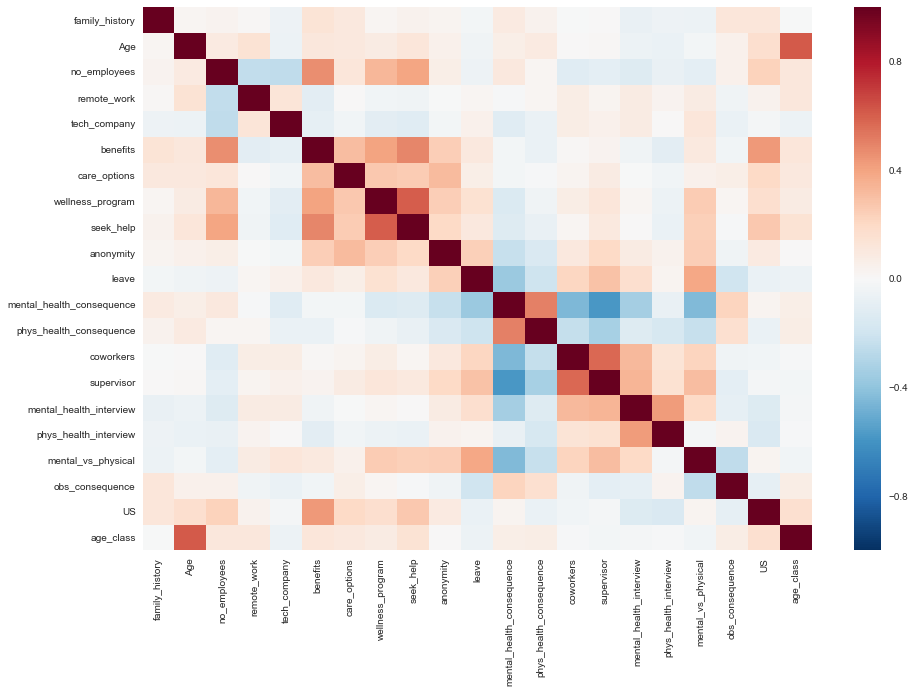

In [315]:
plt.figure(figsize=(15,10))
sns.heatmap(corrmap)

<a id='Initial Model'></a>

LR: 0.767460 (0.044854)
LDA: 0.771490 (0.044511)
KNN: 0.689579 (0.032945)
DTC: 0.701680 (0.060518)
RFC: 0.752298 (0.033717)
NB: 0.753278 (0.037355)
SVM: 0.758328 (0.040090)


/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


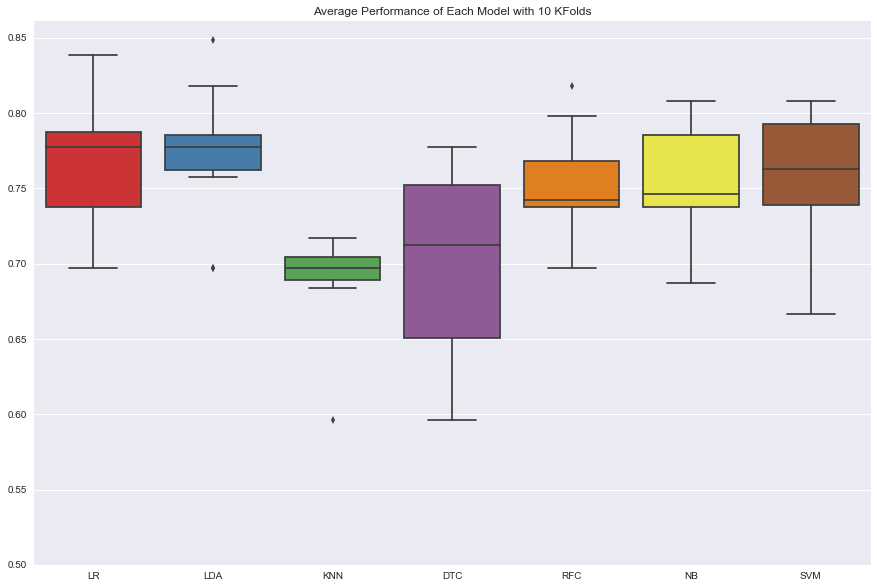

In [305]:
# Compare Classifier Algorithms on Initial Model

# load dataset
X = predictors
Y = outcome

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each type of classifier model
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = KFold(n_splits=10, random_state=27)
  cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
    
# boxplot algorithm comparison
plt.figure(figsize=(15, 10))
plt.title("Average Performance of Each Model with 10 KFolds")
sns.set_style(style="whitegrid")
initial = sns.boxplot(data=results, palette='Set1', notch=False)
initial.set_yticks([0.5, 0.55, 0.60, 0.65, 0.70, 0.75, 0.8, 0.85])
initial.set_xticklabels(['LR','LDA','KNN','DTC','RFC','NB','SVM'])
initial.legend()

<a id='Revised Initial'></a>

In [306]:
## Revised Initial Model

In [309]:
#Recreating feature set without work_interfere item
survey_drop = survey[[
 'treatment',
 'Age',
 'family_history',
 'no_employees',
 'remote_work',
 'tech_company',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence',
 'US',
 'age_class']].copy()

#Dropping NaNs with this feature set
survey_drop = survey_drop.dropna()

print(len(survey_drop))

predictors = survey_drop[['family_history',
 'Age', # cleaned
 'no_employees',
 'remote_work',
 'tech_company',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence',
 'US',
 'age_class']]

outcome = survey_drop['treatment']

##### Coding other variables

predictors.family_history = predictors.family_history.apply(lambda x: 1 if x == "Yes" else 0)

predictors.no_employees = predictors.no_employees.apply(lambda x: 0 if x == "1-5" else x)
predictors.no_employees = predictors.no_employees.apply(lambda x: 1 if x == "6-25" else x)
predictors.no_employees = predictors.no_employees.apply(lambda x: 2 if x == "26-100" else x)
predictors.no_employees = predictors.no_employees.apply(lambda x: 3 if x == "100-500" else x)
predictors.no_employees = predictors.no_employees.apply(lambda x: 4 if x == "500-1000" else x)
predictors.no_employees = predictors.no_employees.apply(lambda x: 5 if x == "More than 1000" else x)

predictors.remote_work = predictors.remote_work.apply(lambda x: 1 if x == "Yes" else 0)

predictors.tech_company = predictors.tech_company.apply(lambda x: 1 if x == "Yes" else 0)

predictors.benefits = predictors.benefits.apply(lambda x: 2 if x == "Yes" else x)
predictors.benefits = predictors.benefits.apply(lambda x: 1 if x == "Don't know" else x)
predictors.benefits = predictors.benefits.apply(lambda x: 0 if x == "No" else x)

predictors.care_options = predictors.care_options.apply(lambda x: 2 if x == "Yes" else x)
predictors.care_options = predictors.care_options.apply(lambda x: 1 if x == "Not sure" else x)
predictors.care_options = predictors.care_options.apply(lambda x: 0 if x == "No" else x)

predictors.wellness_program = predictors.wellness_program.apply(lambda x: 2 if x == "Yes" else x)
predictors.wellness_program = predictors.wellness_program.apply(lambda x: 1 if x == "Don't know" else x)
predictors.wellness_program = predictors.wellness_program.apply(lambda x: 0 if x == "No" else x)

predictors.seek_help = predictors.seek_help.apply(lambda x: 2 if x == "Yes" else x)
predictors.seek_help = predictors.seek_help.apply(lambda x: 1 if x == "Don't know" else x)
predictors.seek_help = predictors.seek_help.apply(lambda x: 0 if x == "No" else x)

predictors.anonymity = predictors.anonymity.apply(lambda x: 2 if x == "Yes" else x)
predictors.anonymity = predictors.anonymity.apply(lambda x: 1 if x == "Don't know" else x)
predictors.anonymity = predictors.anonymity.apply(lambda x: 0 if x == "No" else x)

predictors.leave = predictors.leave.apply(lambda x: 4 if x == "Very easy" else x)
predictors.leave = predictors.leave.apply(lambda x: 3 if x == "Somewhat easy" else x)
predictors.leave = predictors.leave.apply(lambda x: 2 if x == "Don't know" else x)
predictors.leave = predictors.leave.apply(lambda x: 1 if x == "Somewhat difficult" else x)
predictors.leave = predictors.leave.apply(lambda x: 0 if x == "Very difficult" else x)

predictors.mental_health_consequence = predictors.mental_health_consequence.apply(lambda x: 2 if x == "Yes" else x)
predictors.mental_health_consequence = predictors.mental_health_consequence.apply(lambda x: 1 if x == "Maybe" else x)
predictors.mental_health_consequence = predictors.mental_health_consequence.apply(lambda x: 0 if x == "No" else x)

predictors.phys_health_consequence = predictors.phys_health_consequence.apply(lambda x: 2 if x == "Yes" else x)
predictors.phys_health_consequence = predictors.phys_health_consequence.apply(lambda x: 1 if x == "Maybe" else x)
predictors.phys_health_consequence = predictors.phys_health_consequence.apply(lambda x: 0 if x == "No" else x)

predictors.coworkers = predictors.coworkers.apply(lambda x: 2 if x == "Yes" else x)
predictors.coworkers = predictors.coworkers.apply(lambda x: 1 if x == "Some of them" else x)
predictors.coworkers = predictors.coworkers.apply(lambda x: 0 if x == "No" else x)

predictors.supervisor = predictors.supervisor.apply(lambda x: 2 if x == "Yes" else x)
predictors.supervisor = predictors.supervisor.apply(lambda x: 1 if x == "Some of them" else x)
predictors.supervisor = predictors.supervisor.apply(lambda x: 0 if x == "No" else x)

predictors.mental_health_interview = predictors.mental_health_interview.apply(lambda x: 2 if x == "Yes" else x)
predictors.mental_health_interview = predictors.mental_health_interview.apply(lambda x: 1 if x == "Maybe" else x)
predictors.mental_health_interview = predictors.mental_health_interview.apply(lambda x: 0 if x == "No" else x)

predictors.phys_health_interview = predictors.phys_health_interview.apply(lambda x: 2 if x == "Yes" else x)
predictors.phys_health_interview = predictors.phys_health_interview.apply(lambda x: 1 if x == "Maybe" else x)
predictors.phys_health_interview = predictors.phys_health_interview.apply(lambda x: 0 if x == "No" else x)

predictors.mental_vs_physical = predictors.mental_vs_physical.apply(lambda x: 2 if x == "Yes" else x)
predictors.mental_vs_physical = predictors.mental_vs_physical.apply(lambda x: 1 if x == "Don't know" else x)
predictors.mental_vs_physical = predictors.mental_vs_physical.apply(lambda x: 0 if x == "No" else x)

predictors.obs_consequence = predictors.obs_consequence.apply(lambda x: 1 if x == "Yes" else 0)

outcome = outcome.apply(lambda x: 1 if x == "Yes" else 0)

revised_x = predictors
revised_y = outcome

print(predictors.shape)

pd.options.display.float_format = '{:.4f}'.format

corrDF = predictors.copy()
corrDF.treatment = outcome

corrmap = corrDF.corr(method='spearman')

print(corrmap) 

1251


/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


(1251, 21)
                           family_history     Age  no_employees  remote_work  \
family_history                     1.0000  0.0220        0.0339       0.0143   
Age                                0.0220  1.0000        0.0909       0.1441   
no_employees                       0.0339  0.0909        1.0000      -0.2433   
remote_work                        0.0143  0.1441       -0.2433       1.0000   
tech_company                      -0.0496 -0.0599       -0.2518       0.1320   
benefits                           0.1367  0.1106        0.4679      -0.1058   
care_options                       0.1039  0.1033        0.1219       0.0051   
wellness_program                   0.0160  0.0789        0.3321      -0.0357   
seek_help                          0.0417  0.1238        0.3979      -0.0436   
anonymity                          0.0295  0.0538        0.0653      -0.0021   
leave                             -0.0308 -0.0426       -0.0470       0.0234   
mental_health_consequence    

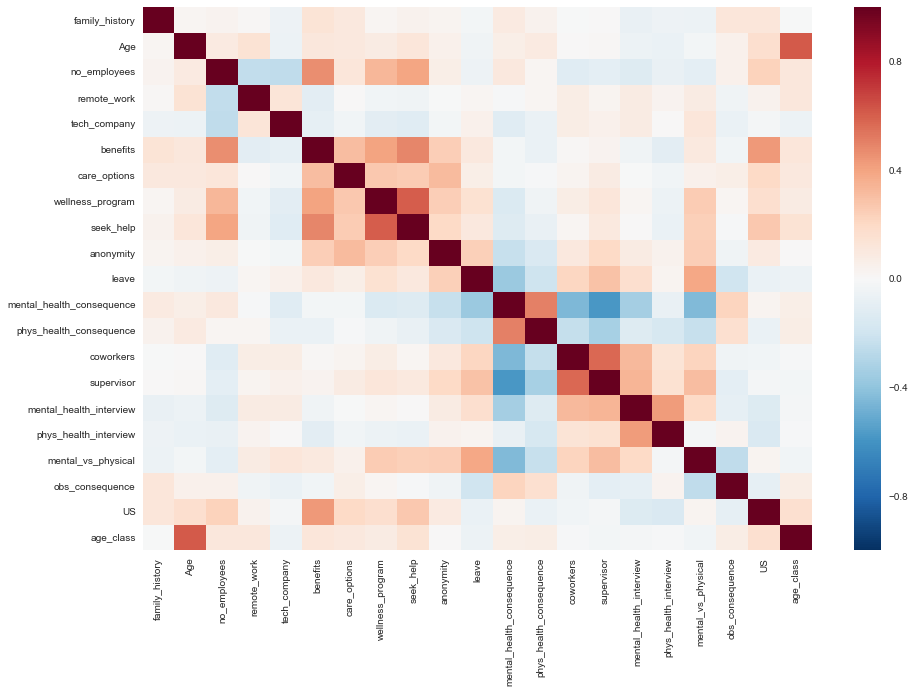

In [313]:
plt.figure(figsize=(15,10))
sns.heatmap(corrmap)

LR: 0.706635 (0.025799)
LDA: 0.712235 (0.023932)
KNN: 0.589905 (0.045869)
DTC: 0.603524 (0.042136)
RFC: 0.680267 (0.028929)
NB: 0.665054 (0.056805)
SVM: 0.692235 (0.028336)


/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


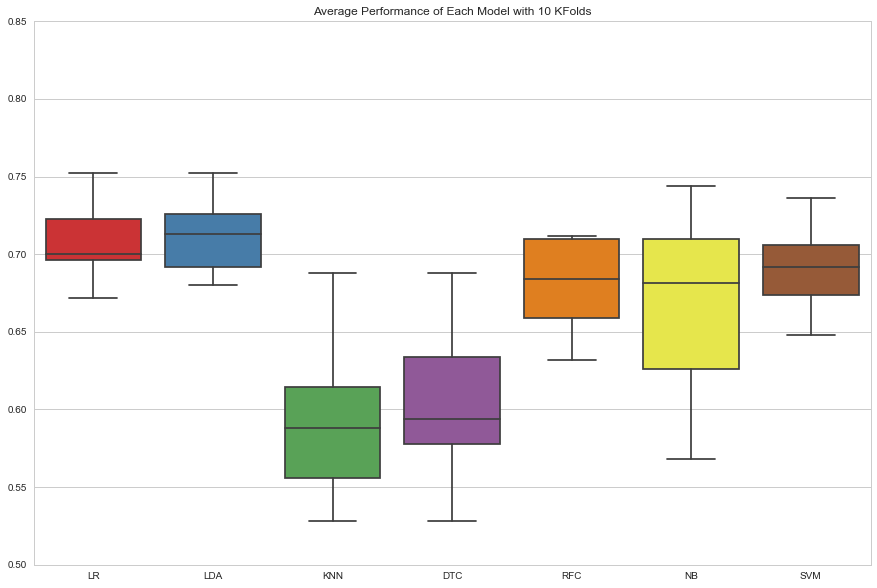

In [308]:
# Compare Classifier Algorithms with Revised Initial Model

# load dataset
X = predictors
Y = outcome

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each type of classifier model
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = KFold(n_splits=10, random_state=27)
  cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
    
# boxplot algorithm comparison
plt.figure(figsize=(15, 10))
plt.title("Average Performance of Each Model with 10 KFolds")
sns.set_style(style="whitegrid")
initial_revised = sns.boxplot(data=results, palette='Set1', notch=False)
initial_revised.set_yticks([0.5, 0.55, 0.60, 0.65, 0.70, 0.75, 0.8, 0.85])
initial_revised.set_xticklabels(['LR','LDA','KNN','DTC','RFC','NB','SVM'])
initial_revised.legend()

<a id='Classifiers'></a>

In [ ]:
##Exploring Classifier Methods
#Test Prep

Tree_X = predictors
Tree_Y = outcome

Forest_X = predictors
Forest_Y = outcome

Bayes_X = predictors
Bayes_Y = outcome

Logit_X = predictors
Logit_Y = outcome

SVC_X = predictors
SVC_Y = outcome

In [ ]:
#Decision Tree
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz

decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features='auto',
    max_depth=None,
#     random_state = 1337 #consider removing
)
decision_tree.fit(Tree_X, Tree_Y)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=Tree_X.columns,
    class_names=['No Tx', 'Yes Tx'],
    filled=True
)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
#Random Forest
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier(
    n_estimators=1000,
    criterion='entropy',
    max_features='auto',
    max_depth=None
)

Forest_X = pd.get_dummies(Forest_X)
Forest_X = Forest_X.dropna(axis=1)

cross_val_outcome = cross_val_score(rfc, Forest_X, Forest_Y, cv=10)
cross_val_mean = cross_val_outcome.mean()
print(cross_val_score(rfc, Forest_X, Forest_Y, cv=10).round(4))
print('~~~~~~~~~~~~~~~~~~')
print("Average: {}".format(cross_val_mean.round(4)))
print('')

pd.options.display.float_format = '{:.4f}'.format

df = pd.DataFrame()
df['imp']= rfc.fit(Forest_X, Forest_Y).feature_importances_
df['features'] = Forest_X.columns
print(df.sort_values(by='imp', ascending=False))

In [ ]:
#Naive Bayes
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
y_pred = bnb.fit(Bayes_X, Bayes_Y).predict(Bayes_X)
print("Number of mislabeled points out of a total {} points : {}".format(
    Bayes_X.shape[0],
    (Bayes_Y != y_pred).sum()
))

Bayes_scores = cross_val_score(bnb, Bayes_X, Bayes_Y, cv=10)
Bayes_mean = Bayes_scores.mean()

print('')
print(Bayes_scores.round(4))
print('~~~~~~~~~~~~~~~~~~')
print("Average: {}".format(Bayes_mean.round(4)))
print('')

In [ ]:
##Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1e9)

fit = lr.fit(Logit_X, Logit_Y)

print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(Logit_X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, Logit_Y))

print('\n Percentage accuracy')
print(lr.score(Logit_X, Logit_Y).round(4))

Logit_scores = cross_val_score(lr, Logit_X, Logit_Y, cv=10)
Logit_mean = Logit_scores.mean()

print('')
print(Logit_scores)
print('~~~~~~~~~~~~~~~~~~')
print("Average: {}".format(Logit_mean.round(4)))
print('')

In [ ]:
##SVM

from sklearn.svm import SVC

svm = SVC(kernel = 'rbf')  #Thinkful recommends rbf, I had linear, just tried diff methods and poly gets highest accuracy
print(svm.fit(SVC_X, SVC_Y))
svm.score(SVC_X, SVC_Y)

SVC_scores = cross_val_score(svm, SVC_X, SVC_Y, cv=10)
SVC_mean = SVC_scores.mean()

print('')
print(SVC_scores)
print('~~~~~~~~~~~~~~~~~~')
print("Average: {}".format(SVC_mean.round(4)))
print('')

<a id='Feature Reduction'></a>

In [ ]:
## Feature Reduction

1259


/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


                  no_employees   leave  care_options  benefits  \
no_employees            1.0000 -0.0497        0.1127    0.4645   
leave                  -0.0497  1.0000        0.0696    0.1079   
care_options            0.1127  0.0696        1.0000    0.3109   
benefits                0.4645  0.1079        0.3109    1.0000   
wellness_program        0.3279  0.1542        0.2707    0.4077   
seek_help               0.3946  0.1088        0.2528    0.4894   

                  wellness_program  seek_help  
no_employees                0.3279     0.3946  
leave                       0.1542     0.1088  
care_options                0.2707     0.2528  
benefits                    0.4077     0.4894  
wellness_program            1.0000     0.6067  
seek_help                   0.6067     1.0000  


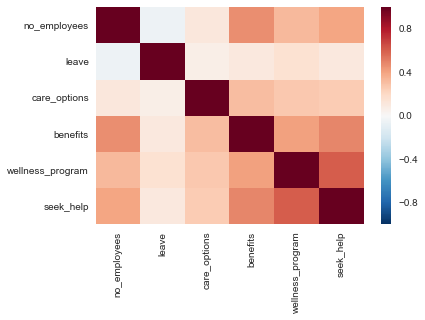

In [316]:
#Reduced feature set
survey_drop = survey[[
 'treatment',
 'no_employees',
 'leave',
 'care_options',
 'benefits',
 'wellness_program',
 'seek_help']].copy()

#Dropping NaNs with this feature set (should contain all observations, n = 1259)
survey_drop = survey_drop.dropna()

print(len(survey_drop))

predictors = survey_drop[['no_employees', 'leave', 'care_options', 'benefits', 'wellness_program', 'seek_help']]

outcome = survey_drop['treatment']

predictors.no_employees = predictors.no_employees.apply(lambda x: 0 if x == "1-5" else x)
predictors.no_employees = predictors.no_employees.apply(lambda x: 1 if x == "6-25" else x)
predictors.no_employees = predictors.no_employees.apply(lambda x: 2 if x == "26-100" else x)
predictors.no_employees = predictors.no_employees.apply(lambda x: 3 if x == "100-500" else x)
predictors.no_employees = predictors.no_employees.apply(lambda x: 4 if x == "500-1000" else x)
predictors.no_employees = predictors.no_employees.apply(lambda x: 5 if x == "More than 1000" else x)

predictors.leave = predictors.leave.apply(lambda x: 4 if x == "Very easy" else x)
predictors.leave = predictors.leave.apply(lambda x: 3 if x == "Somewhat easy" else x)
predictors.leave = predictors.leave.apply(lambda x: 2 if x == "Don't know" else x)
predictors.leave = predictors.leave.apply(lambda x: 1 if x == "Somewhat difficult" else x)
predictors.leave = predictors.leave.apply(lambda x: 0 if x == "Very difficult" else x)

predictors.care_options = predictors.care_options.apply(lambda x: 2 if x == "Yes" else x)
predictors.care_options = predictors.care_options.apply(lambda x: 1 if x == "Not sure" else x)
predictors.care_options = predictors.care_options.apply(lambda x: 0 if x == "No" else x)

predictors.benefits = predictors.benefits.apply(lambda x: 2 if x == "Yes" else x)
predictors.benefits = predictors.benefits.apply(lambda x: 1 if x == "Don't know" else x)
predictors.benefits = predictors.benefits.apply(lambda x: 0 if x == "No" else x)

predictors.wellness_program = predictors.wellness_program.apply(lambda x: 2 if x == "Yes" else x)
predictors.wellness_program = predictors.wellness_program.apply(lambda x: 1 if x == "Don't know" else x)
predictors.wellness_program = predictors.wellness_program.apply(lambda x: 0 if x == "No" else x)

predictors.seek_help = predictors.seek_help.apply(lambda x: 2 if x == "Yes" else x)
predictors.seek_help = predictors.seek_help.apply(lambda x: 1 if x == "Don't know" else x)
predictors.seek_help = predictors.seek_help.apply(lambda x: 0 if x == "No" else x)

outcome = outcome.apply(lambda x: 1 if x == "Yes" else 0)

pd.options.display.float_format = '{:.4f}'.format

corrDF = predictors.copy()
corrDF.treatment = outcome

corrmap = corrDF.corr(method='spearman')

print(corrmap) 

sns.heatmap(corrmap)

LR: 0.610006 (0.039280)
LDA: 0.610006 (0.040698)
KNN: 0.578273 (0.033526)
DTC: 0.594127 (0.020415)
RFC: 0.599695 (0.037284)
NB: 0.621111 (0.038069)
SVM: 0.646571 (0.035821)


/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


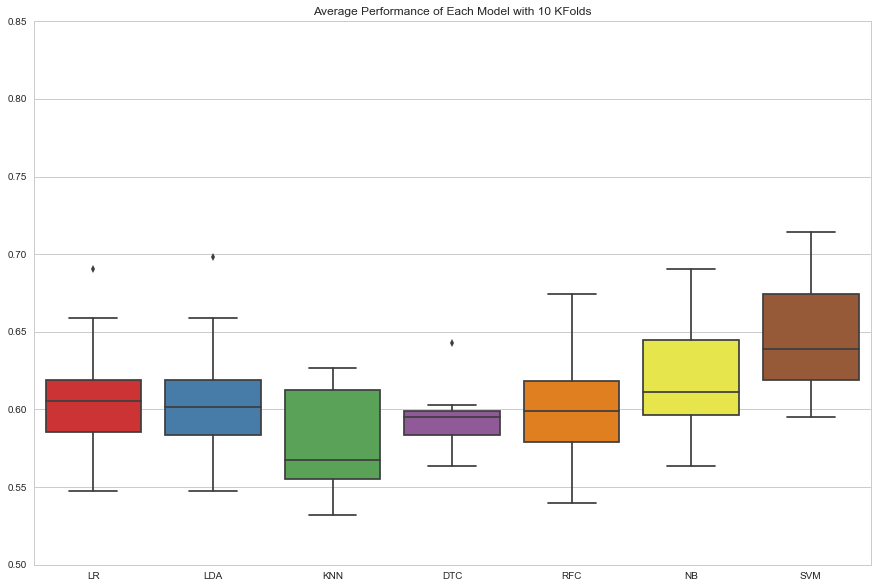

In [317]:
# Compare Classifier Algorithms with Reduced Feature Set Model

# load dataset
X = predictors
Y = outcome

RFC_params = {'criterion': 'entropy', 'max_depth': 2, 'max_leaf_nodes': 2, 'n_estimators': 10}

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each type of classifier model
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = KFold(n_splits=10, random_state=27)
  cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
    
# boxplot algorithm comparison
plt.figure(figsize=(15, 10))
plt.title("Average Performance of Each Model with 10 KFolds")
sns.set_style(style="whitegrid")
g = sns.boxplot(data=results, palette='Set1', notch=False)
g.set_yticks([0.5, 0.55, 0.60, 0.65, 0.70, 0.75, 0.8, 0.85])
g.set_xticklabels(['LR','LDA','KNN','DTC','RFC','NB','SVM'])
g.legend()

<a id='Hyper'></a>

In [ ]:
## Grid Search 




# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score'] 
stds = grid_result.cv_results_['std_test_score'] 
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [236]:
# Randomized for Algorithm Tuning
X = predictors
Y = outcome
param_grid = {'max_iter': [1,2,3,4,5,6,7], 'tol': uniform(), 'C': [1000000000.0, 100.0, 1.0],
 'penalty': ['l1', 'l2']}
model = LogisticRegression()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100,
    random_state=7)
rsearch.fit(X, Y)
print(rsearch.best_score_)
print(rsearch.best_estimator_.max_iter)
print(rsearch.best_estimator_.tol)
print(clf_Logit.best_estimator_.penalty)
print(clf_Logit.best_estimator_.C)
print(clf_Logit.best_estimator_.tol)

0.609213661636
1
0.0922623458468
l1
1000000000.0
0.01


In [232]:
#Logit Regression
grid = [{'C': [1000000000.0, 100.0, 1.0],
 'penalty': ['l1', 'l2'],
#  'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag'],
 'tol': [0.0001, 0.0005, 0.001, 0.01],
}]

clf_Logit = GridSearchCV(LogisticRegression(), grid)
clf_Logit.fit(predictors, outcome)



GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'C': [1000000000.0, 100.0, 1.0], 'penalty': ['l1', 'l2'], 'tol': [0.0001, 0.0005, 0.001, 0.01]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [233]:
print(clf_Logit.best_score_)
print(clf_Logit.best_estimator_.penalty)
print(clf_Logit.best_estimator_.C)
print(clf_Logit.best_estimator_.tol)

0.593328038125
l1
1000000000.0
0.01


In [218]:
##SVM

# specify parameters and distributions to sample from
grid = {"tol": [0.001, 0.0001, 0.00001, 0.01, 0.1, 0.5],
        "degree": [1,2,3,4,5,6],
        "C": [1.0, 11.0, 111.0, 0.1]}

clf_SVC = GridSearchCV(SVC(), grid)
clf_SVC.fit(predictors, outcome)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'tol': [0.001, 0.0001, 1e-05, 0.01, 0.1, 0.5], 'degree': [1, 2, 3, 4, 5, 6], 'C': [1.0, 11.0, 111.0, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [ ]:
print(sorted(clf_SVC.cv_results_['mean_test_score']))
print(clf_SVC.best_score_)
print(clf_SVC.best_params_)

In [ ]:
# For RFC

grid = [{
#     "n_iter": randint(1, 6),
         'criterion': ['entropy'], 
         'max_depth': [1, 2, 3], 
         'max_leaf_nodes': [4, 6, 8, 10, 12],
         'n_estimators': [10, 15, 20, 25, 30, 50]}]

clf_RFC = GridSearchCV(ensemble.RandomForestClassifier(), grid)
clf_RFC.fit(Forest_X, Forest_Y)

In [ ]:
# RFC Scores
scores = sorted(clf_RFC.cv_results_['mean_test_score'])
print(scores)
print(clf_RFC.best_score_)
print(clf_RFC.best_params_)

<a id='Boosting'></a>

AB: 0.619673 (0.046248)
GBM: 0.640475 (0.038654)
RF: 0.597743 (0.052358)
ET: 0.575822 (0.053383)


/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


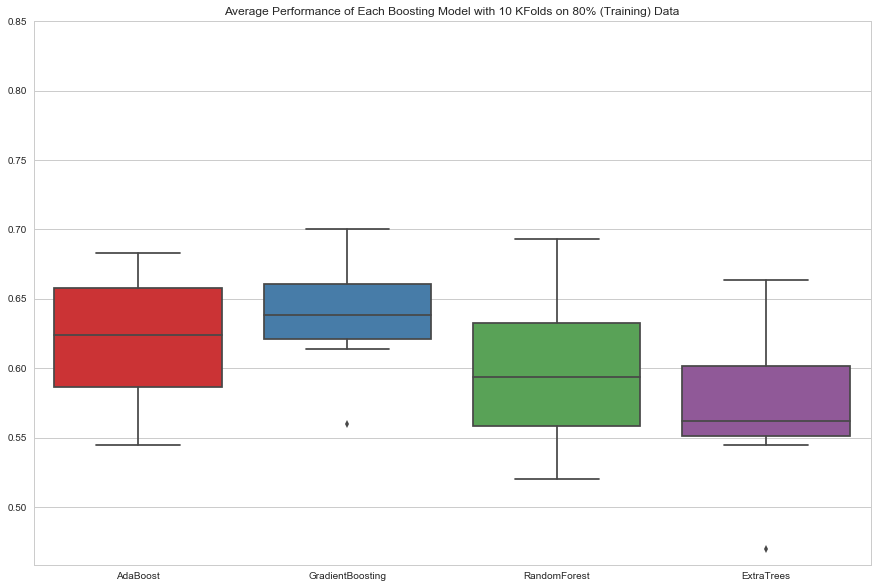

In [318]:
## Boosting

# Boosting Method ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier())) 
ensembles.append(('GBM', GradientBoostingClassifier())) 
ensembles.append(('RF', RandomForestClassifier())) 
ensembles.append(('ET', ExtraTreesClassifier())) 
results = []
names = []
for name, model in ensembles:
  kfold = KFold(n_splits=10, random_state=7)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
    
# Compare Algorithms
plt.figure(figsize=(15, 10))
plt.title("Average Performance of Each Boosting Model with 10 KFolds on 80% (Training) Data")
sns.set_style(style="whitegrid")
g = sns.boxplot(data=results, palette='Set1', notch=False)
g.set_yticks([0.5, 0.55, 0.60, 0.65, 0.70, 0.75, 0.8, 0.85])
g.set_xticklabels(['AdaBoost','GradientBoosting','RandomForest','ExtraTrees'])
g.legend()

<a id='Final'></a>

In [319]:
## Final Model

20% test size, 10 K-folds
LR: 0.591861 (0.027802)
NB: 0.603723 (0.037003)
SVM: 0.637545 (0.046404)


full data set, 10 K-Folds
LR: 0.602863 (0.042544)
NB: 0.621111 (0.038069)
SVM: 0.646571 (0.035821)


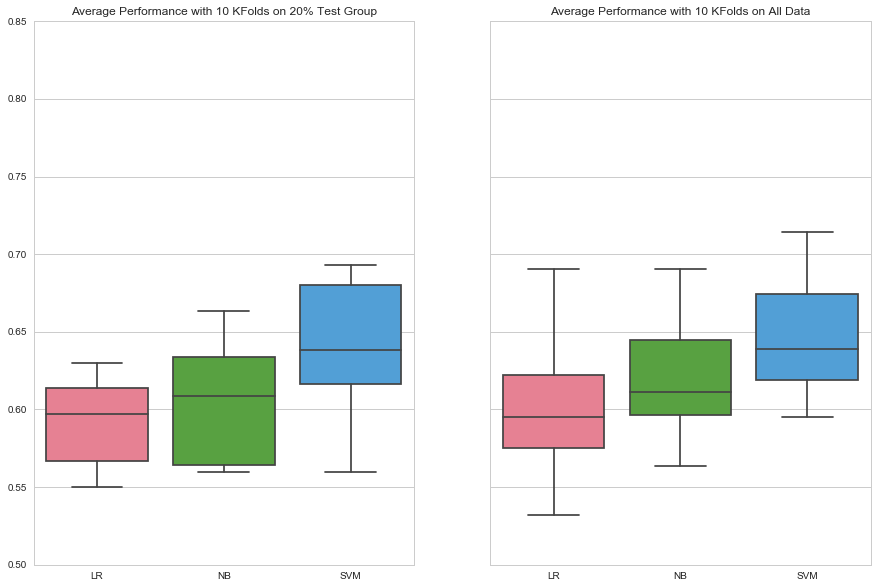

In [320]:
## Testing the tuned model

print('20% test size, 10 K-folds')
num_folds = 10
seed = 7
scoring = 'accuracy'

# Split-out validation dataset
X = predictors
Y = outcome

validation_size = 0.20
seed = 7

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
    test_size=validation_size, random_state=seed)

# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression(max_iter=5, tol=0.77991879224)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(C=1.0, degree=1, tol=0.001)))

validation_results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  validation_results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
    
print('')
print('')
    
    

print('full data set, 10 K-Folds')
# load dataset
X = predictors
Y = outcome
# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter=5, tol=0.77991879224)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(C=1.0, degree=1, tol=0.001)))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = KFold(n_splits=10, random_state=27)
  cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

    
# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,10))
# f = plt.figure(figsize=(15,10))
sns.set_style(style="whitegrid")
# ax1.title("Average Performance of Each Boosting Model with 10 KFolds on 80% (Training) Data")
sns.boxplot(data=validation_results, palette="husl", ax=ax1)
sns.boxplot(data=results, palette="husl", ax=ax2)



ax1.set_title("Average Performance with 10 KFolds on 20% Test Group")
ax1.set_xticklabels(names)
ax1.set_yticks([0.5, 0.55, 0.60, 0.65, 0.70, 0.75, 0.8, 0.85])
ax2.set_title("Average Performance with 10 KFolds on All Data")
ax2.set_xticklabels(names)
ax2.set_yticks([0.5, 0.55, 0.60, 0.65, 0.70, 0.75, 0.8, 0.85])

Final Model, 6 features, 10 K-Folds
LR: 0.602863 (0.042544)
NB: 0.621111 (0.038069)
SVM: 0.646571 (0.035821)
Initial Model, 22 features, 10 K-Folds
LR: 0.635013 (0.045947)
NB: 0.753278 (0.037355)
SVM: 0.758328 (0.040090)
Revised Initial Model, 21 features, 10 K-Folds
LR: 0.703416 (0.028243)
NB: 0.665054 (0.056805)
SVM: 0.692235 (0.028336)


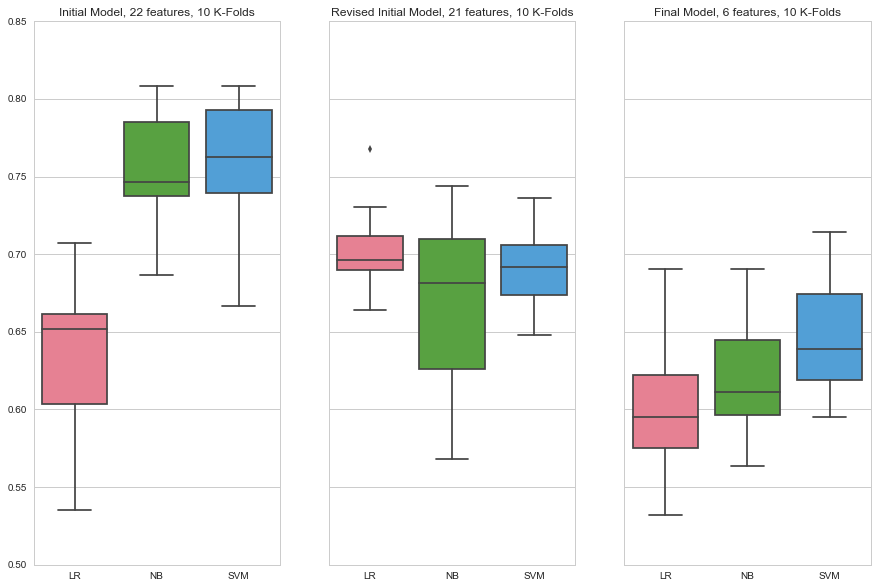

In [321]:
#Comparing the Final Model to the Original Revised and Tuned Modles


print('Final Model, 6 features, 10 K-Folds')
# load dataset
X = predictors
Y = outcome
# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter=5, tol=0.77991879224)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(C=1.0, degree=1, tol=0.001)))
# evaluate each model in turn
final_results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = KFold(n_splits=10, random_state=27)
  cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
  final_results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)


print('Initial Model, 22 features, 10 K-Folds')
# load dataset
X = initial_x
Y = initial_y
# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter=5, tol=0.77991879224)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(C=1.0, degree=1, tol=0.001)))
# evaluate each model in turn
initial_results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = KFold(n_splits=10, random_state=27)
  cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
  initial_results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

print('Revised Initial Model, 21 features, 10 K-Folds')
# load dataset
X = revised_x
Y = revised_y
# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter=5, tol=0.77991879224)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(C=1.0, degree=1, tol=0.001)))
# evaluate each model in turn
revised_results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = KFold(n_splits=10, random_state=27)
  cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
  revised_results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
    
        
# Two subplots, unpack the axes array immediately
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,10))
# f = plt.figure(figsize=(15,10))
sns.set_style(style="whitegrid")
# ax1.title("Average Performance of Each Boosting Model with 10 KFolds on 80% (Training) Data")
sns.boxplot(data=initial_results, palette="husl", ax=ax1)
sns.boxplot(data=revised_results, palette="husl", ax=ax2)
sns.boxplot(data=final_results, palette="husl", ax=ax3)


ax1.set_title("Initial Model, 22 features, 10 K-Folds")
ax1.set_xticklabels(names)
ax1.set_yticks([0.5, 0.55, 0.60, 0.65, 0.70, 0.75, 0.8, 0.85])
ax2.set_title("Revised Initial Model, 21 features, 10 K-Folds")
ax2.set_xticklabels(names)
ax2.set_yticks([0.5, 0.55, 0.60, 0.65, 0.70, 0.75, 0.8, 0.85])
ax3.set_title("Final Model, 6 features, 10 K-Folds")
ax3.set_xticklabels(names)
ax3.set_yticks([0.5, 0.55, 0.60, 0.65, 0.70, 0.75, 0.8, 0.85])

<a id='Appendix'></a>

In [ ]:
## Appendix

Instructions:

Dataset Information

This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace. You are also encouraged to analyze data from the ongoing 2016 survey found here.

Content

This dataset contains the following data:

<b>Timestamp</b> (automatic)  

<b>Age</b> (numeric; extreme values)  

<b>Gender</b> (free text)  

<b>Country</b>  (dropdown menu)

<b>state:</b> If you live in the United States, which state or territory do you live in?  (dropdown menu; contains NAs)

<b>self_employed:</b> Are you self-employed?  (contains NAs)  

<b>family_history:</b> Do you have a family history of mental illness?  (yes/no)  

<b>treatment:</b> Have you sought treatment for a mental health condition?  (yes/no)  

<b>work_interfere:</b> If you have a mental health condition, do you feel that it interferes with your work?  (contains (accidental?) NAs)

<b>no_employees:</b> How many employees does your company or organization have?  

<b>remote_work:</b> Do you work remotely (outside of an office) at least 50% of the time?  

<b>tech_company:</b> Is your employer primarily a tech company/organization?  

<b>benefits:</b> Does your employer provide mental health benefits?  

<b>care_options:</b> Do you know the options for mental health care your employer provides?  

<b>wellness_program:</b> Has your employer ever discussed mental health as part of an employee wellness program?  

<b>seek_help:</b> Does your employer provide resources to learn more about mental health issues and how to seek help?  

<b>anonymity:</b> Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?  

<b>leave:</b> How easy is it for you to take medical leave for a mental health condition?  

<b>mental_health_consequence:</b> Do you think that discussing a mental health issue with your employer would have negative consequences?  

<b>phys_health_consequence:</b> Do you think that discussing a physical health issue with your employer would have negative consequences?  

<b>coworkers:</b> Would you be willing to discuss a mental health issue with your coworkers?  

<b>supervisor:</b> Would you be willing to discuss a mental health issue with your direct supervisor(s)?  

<b>mental_health_interview:</b> Would you bring up a mental health issue with a potential employer in an interview?  

<b>phys_health_interview:</b> Would you bring up a physical health issue with a potential employer in an interview?  

<b>mental_vs_physical:</b> Do you feel that your employer takes mental health as seriously as physical health?  

<b>obs_consequence:</b> Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?  

<b>comments:</b> Any additional notes or comments  


Inspiration

Some questions worth exploring:

How does the frequency of mental health illness and attitudes towards mental health vary by geographic location?  
What are the strongest predictors of mental health illness or certain attitudes towards mental health in the workplace?  


Acknowledgements

The original dataset is from Open Sourcing Mental Illness and can be downloaded here.

In [ ]:
### The tests

In [126]:
#Test Prep

Tree_X = predictors
Tree_Y = outcome

Forest_X = predictors
Forest_Y = outcome

Bayes_X = predictors
Bayes_Y = outcome

Logit_X = predictors
Logit_Y = outcome

SVC_X = predictors
SVC_Y = outcome

In [286]:
#Naive Bayes
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
y_pred = bnb.fit(Bayes_X, Bayes_Y).predict(Bayes_X)
print("Number of mislabeled points out of a total {} points : {}".format(
    Bayes_X.shape[0],
    (Bayes_Y != y_pred).sum()
))

Bayes_scores = cross_val_score(bnb, Bayes_X, Bayes_Y, cv=10)
Bayes_mean = Bayes_scores.mean()

print('')
print(Bayes_scores.round(4))
print('~~~~~~~~~~~~~~~~~~')
print("Average: {}".format(Bayes_mean.round(4)))
print('')

Number of mislabeled points out of a total 1259 points : 533

[ 0.5748  0.5984  0.5476  0.6825  0.5     0.6587  0.5317  0.552   0.552
  0.52  ]
~~~~~~~~~~~~~~~~~~
Average: 0.5718



In [287]:
##Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1e9)

fit = lr.fit(Logit_X, Logit_Y)

print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(Logit_X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, Logit_Y))

print('\n Percentage accuracy')
print(lr.score(Logit_X, Logit_Y).round(4))

Logit_scores = cross_val_score(lr, Logit_X, Logit_Y, cv=10)
Logit_mean = Logit_scores.mean()

print('')
print(Logit_scores)
print('~~~~~~~~~~~~~~~~~~')
print("Average: {}".format(Logit_mean.round(4)))
print('')

Coefficients
[[-0.08879007 -0.22588365  0.53659513  0.36938272 -0.02134032 -0.08941926]]
[-0.08180719]

 Accuracy by admission status
treatment    0    1
row_0              
0          374  243
1          248  394

 Percentage accuracy
0.61

[ 0.58267717  0.61417323  0.56349206  0.72222222  0.63492063  0.58730159
  0.5952381   0.568       0.536       0.592     ]
~~~~~~~~~~~~~~~~~~
Average: 0.5996



In [288]:
##SVM

from sklearn.svm import SVC

svm = SVC(kernel = 'rbf')  #Thinkful recommends rbf, I had linear, just tried diff methods and poly gets highest accuracy
print(svm.fit(SVC_X, SVC_Y))
svm.score(SVC_X, SVC_Y)

SVC_scores = cross_val_score(svm, SVC_X, SVC_Y, cv=10)
SVC_mean = SVC_scores.mean()

print('')
print(SVC_scores)
print('~~~~~~~~~~~~~~~~~~')
print("Average: {}".format(SVC_mean.round(4)))
print('')

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

[ 0.62992126  0.68503937  0.58730159  0.67460317  0.67460317  0.6031746
  0.65079365  0.616       0.64        0.696     ]
~~~~~~~~~~~~~~~~~~
Average: 0.6457



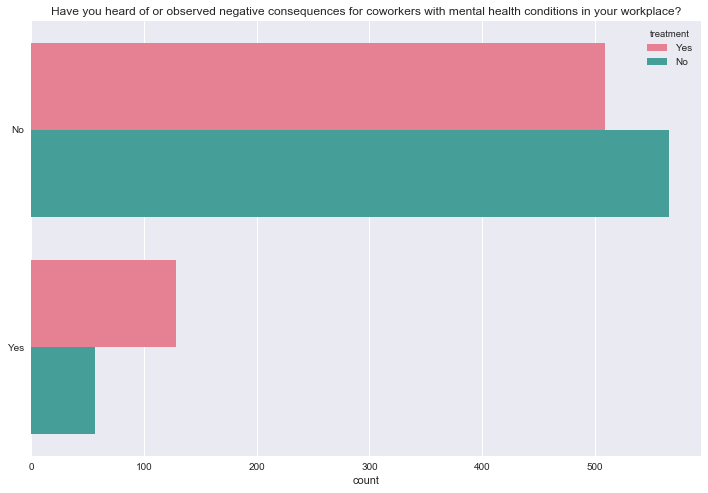

In [147]:
plt.figure(figsize=(12, 8))
sns.set_style("darkgrid")
ax = sns.countplot(y="obs_consequence", hue="treatment",
              palette="husl", order = ['No', 'Yes'],
              data=survey)
ax.set_title("Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?")
ax.set(ylabel="")

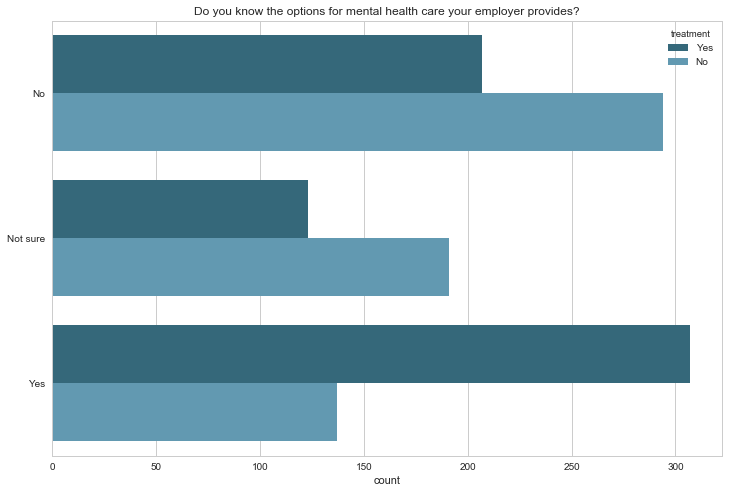

In [148]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax = sns.countplot(y="care_options", hue="treatment", 
                   palette="PuBuGn_d", order = ['No', 'Not sure', 'Yes'], 
                   data=survey)
ax.set_title("Do you know the options for mental health care your employer provides?")
ax.set(ylabel="")

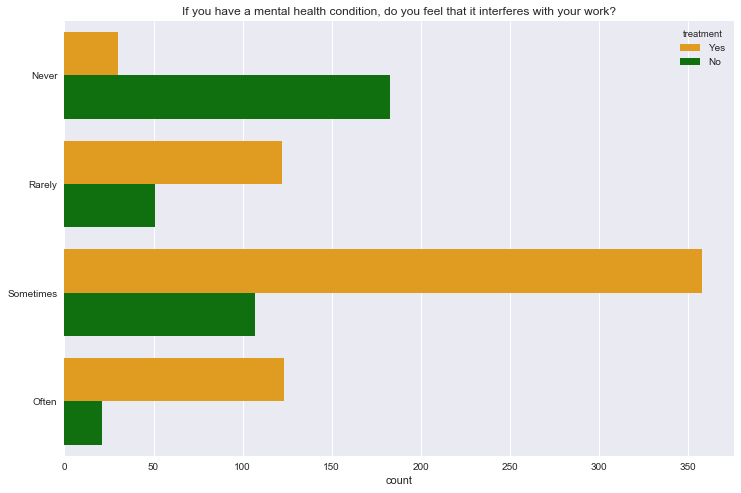

In [156]:
plt.figure(figsize=(12, 8))
sns.set_style("darkgrid")
ax = sns.countplot(y="work_interfere", hue="treatment", 
                   palette=["orange", "green"], order = ['Never', 'Rarely', 'Sometimes', 'Often'], 
                   data=survey)
ax.set_title("If you have a mental health condition, do you feel that it interferes with your work?")
ax.set(ylabel="")


# 'work_interfere','no_employees','family_history','leave','care_options', 'benefits'

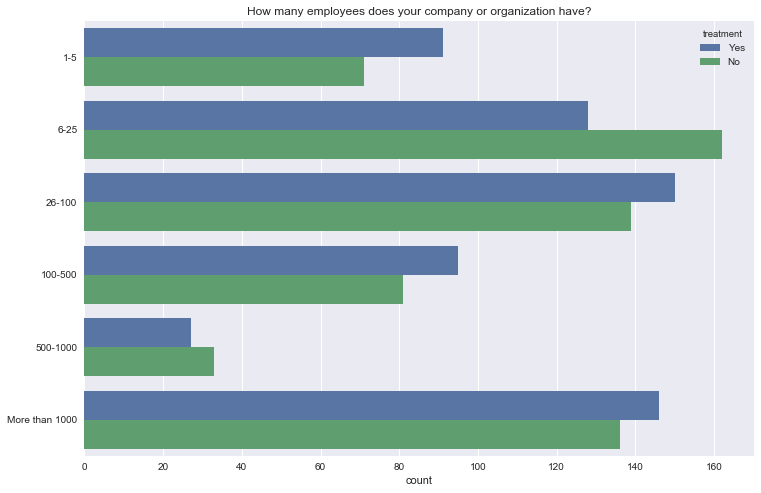

In [16]:
plt.figure(figsize=(12, 8))
sns.set_style("darkgrid")
ax = sns.countplot(y="no_employees", hue="treatment", 
                   order=["1-5", "6-25", "26-100", "100-500", "500-1000", "More than 1000"],
                   data=survey)
ax.set_title("How many employees does your company or organization have?")
ax.set(ylabel="")

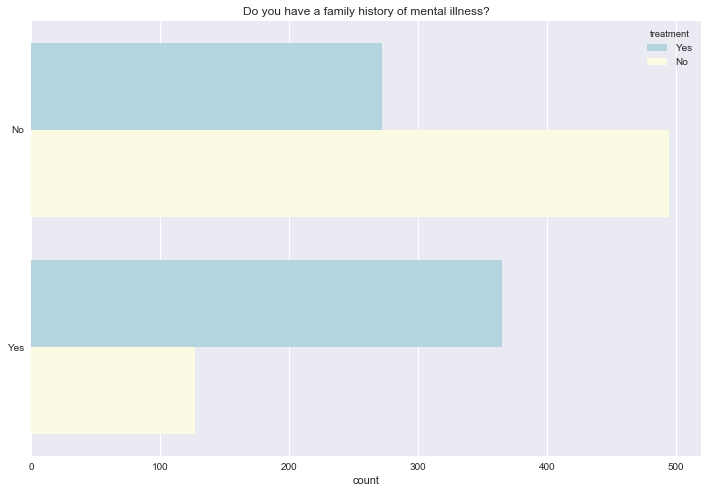

In [174]:

plt.figure(figsize=(12, 8))
sns.set_style("darkgrid")
ax = sns.countplot(y="family_history", hue="treatment", 
                   palette=["lightblue", "lightyellow"], 
                   data=survey)
ax.set_title("Do you have a family history of mental illness?")
ax.set(ylabel="")


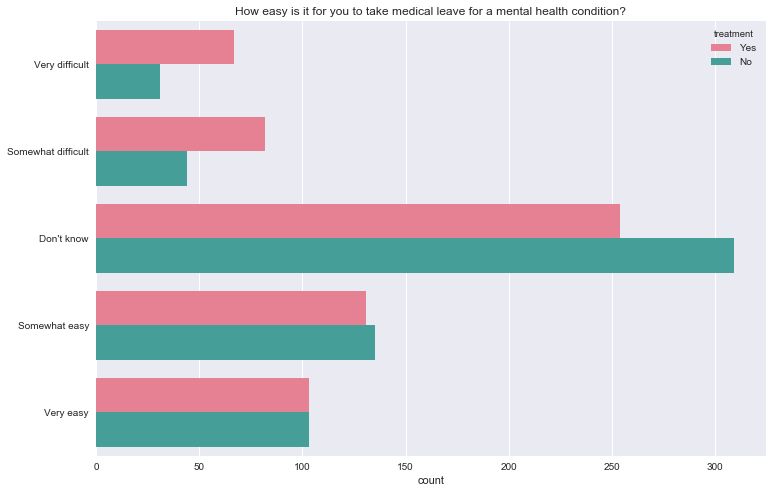

In [184]:

plt.figure(figsize=(12, 8))
sns.set_style("darkgrid")
ax = sns.countplot(y="leave", hue="treatment", 
                   palette="husl", order = ['Very difficult', 'Somewhat difficult', 
                                           "Don't know", 'Somewhat easy', 'Very easy'],
                   data=survey)
ax.set_title("How easy is it for you to take medical leave for a mental health condition?")
ax.set(ylabel="")


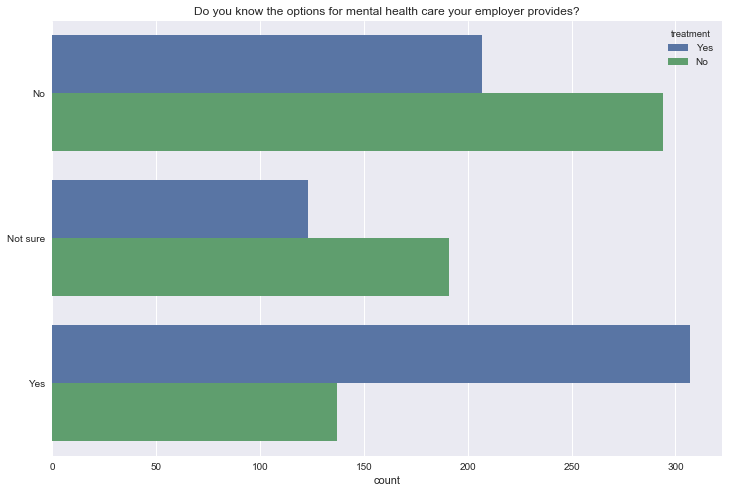

In [190]:

plt.figure(figsize=(12, 8))
sns.set_style("darkgrid")
ax = sns.countplot(y="care_options", hue="treatment", 
                   order=['No', 'Not sure', 'Yes'],
                   data=survey)
ax.set_title("Do you know the options for mental health care your employer provides?")
ax.set(ylabel="")


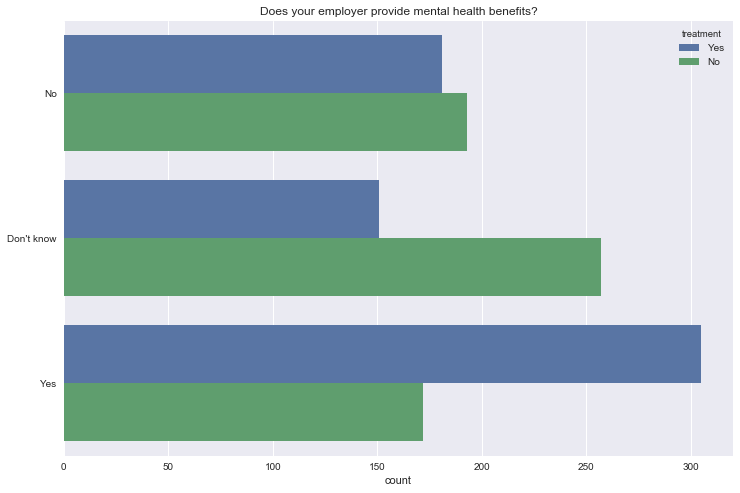

In [193]:
plt.figure(figsize=(12, 8))
sns.set_style("darkgrid")
ax = sns.countplot(y="benefits", hue="treatment", 
                   order=['No', "Don't know", 'Yes'],
                   data=survey)
ax.set_title("Does your employer provide mental health benefits?")
ax.set(ylabel="")


In [405]:
survey2 = survey.copy()

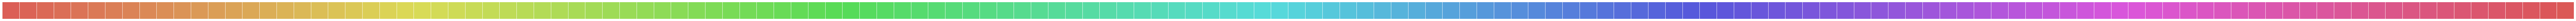

In [72]:
hey = sns.palplot(sns.color_palette("hls", 150))

In [227]:
len(survey[survey['Country'] == 'United States'])

751

In [406]:
len(survey2)

1259

0.655281969817


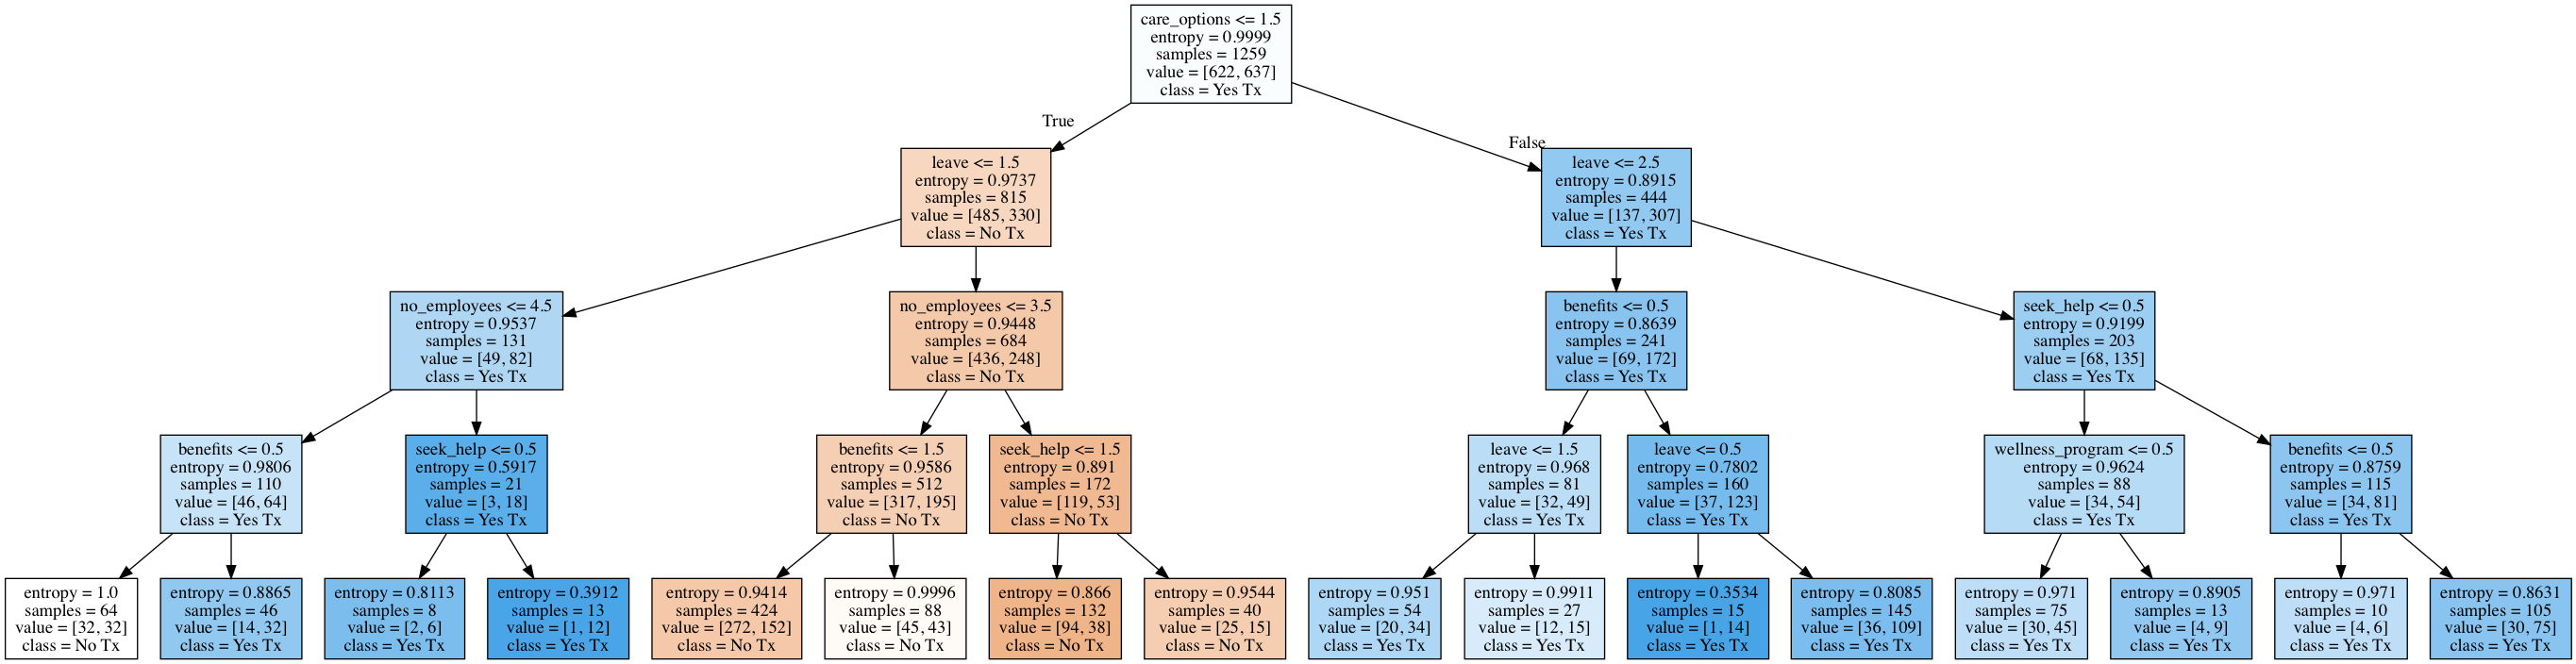

In [157]:
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz

decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features='auto',
    max_depth=4,
#     random_state = 1337 #consider removing
)
decision_tree.fit(predictors, outcome)
print(decision_tree.score(predictors, outcome))

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=predictors.columns,
    class_names=['No Tx', 'Yes Tx'],
    filled=True
)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [158]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier(
    n_estimators=1000,
    criterion='entropy',
    max_features='auto',
    max_depth=None
)
X = predictors
Y = outcome
X = pd.get_dummies(X)
X = X.dropna(axis=1)

cross_val_outcome = cross_val_score(rfc, X, Y, cv=10)
cross_val_mean = cross_val_outcome.mean()
print(cross_val_score(rfc, X, Y, cv=10))
print('~~~~~~~~~~~~~~~~~~')
print("Average: {}".format(cross_val_mean.round(4)))
print('')

df = pd.DataFrame()
df['imp']= rfc.fit(X, Y).feature_importances_
df['features'] = X.columns
print(df.sort_values(by='imp', ascending=False))

[ 0.58267717  0.63779528  0.63492063  0.55555556  0.61111111  0.58730159
  0.63492063  0.64        0.536       0.608     ]
~~~~~~~~~~~~~~~~~~
Average: 0.5997

   imp          features
0    0      no_employees
1    0             leave
2    0      care_options
3    0          benefits
5    0         seek_help
4    0  wellness_program


In [159]:

bnb = BernoulliNB()
y_pred = bnb.fit(predictors, outcome).predict(predictors)
print("Number of mislabeled points out of a total {} points : {}".format(
    predictors.shape[0],
    (outcome != y_pred).sum()
))

Bayes_scores = cross_val_score(bnb, X, Y, cv=10)
Bayes_mean = Bayes_scores.mean()

print('')
print(Bayes_scores)
print('~~~~~~~~~~~~~~~~~~')
print("Average: {}".format(Bayes_mean.round(4)))
print('')

Number of mislabeled points out of a total 1259 points : 533

[ 0.57480315  0.5984252   0.54761905  0.68253968  0.5         0.65873016
  0.53174603  0.552       0.552       0.52      ]
~~~~~~~~~~~~~~~~~~
Average: 0.5718



In [160]:
##Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1e9)

fit = lr.fit(predictors, outcome)

print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(predictors)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, outcome))

print('\n Percentage accuracy')
print(lr.score(predictors, outcome).round(4))

Logit_scores = cross_val_score(lr, predictors, outcome, cv=10)
Logit_mean = Logit_scores.mean()

print('')
print(Logit_scores)
print('~~~~~~~~~~~~~~~~~~')
print("Average: {}".format(Logit_mean.round(4)))
print('')

Coefficients
[[-0.08879007 -0.22588365  0.53659513  0.36938272 -0.02134032 -0.08941926]]
[-0.08180719]

 Accuracy by admission status
treatment    0    1
row_0              
0          374  243
1          248  394

 Percentage accuracy
0.61

[ 0.58267717  0.61417323  0.56349206  0.72222222  0.63492063  0.58730159
  0.5952381   0.568       0.536       0.592     ]
~~~~~~~~~~~~~~~~~~
Average: 0.5996



In [164]:
##SVM

X = predictors
Y = outcome
svm = SVC(kernel = 'rbf')  
print(svm.fit(X, Y))
svm.score(X, Y)

SVC_scores = cross_val_score(svm, X, Y, cv=10)
SVC_mean = SVC_scores.mean()

print('')
print(SVC_scores)
print('~~~~~~~~~~~~~~~~~~')
print("Average: {}".format(SVC_mean.round(4)))
print('')

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

[ 0.62992126  0.68503937  0.58730159  0.67460317  0.67460317  0.6031746
  0.65079365  0.616       0.64        0.696     ]
~~~~~~~~~~~~~~~~~~
Average: 0.6457



In [ ]:
### consider re-running the random forest with less features based on outcome of importance values

In [3]:
# who the data belongs to

Instructions:

Dataset Information

This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace. You are also encouraged to analyze data from the ongoing 2016 survey found here.

Content

This dataset contains the following data:

<b>Timestamp</b> (automatic)  

<b>Age</b> (numeric; extreme values)  

<b>Gender</b> (free text)  

<b>Country</b>  (dropdown menu)

<b>state:</b> If you live in the United States, which state or territory do you live in?  (dropdown menu; contains NAs)

<b>self_employed:</b> Are you self-employed?  (contains NAs)  

<b>family_history:</b> Do you have a family history of mental illness?  (yes/no)  

<b>treatment:</b> Have you sought treatment for a mental health condition?  (yes/no)  

<b>work_interfere:</b> If you have a mental health condition, do you feel that it interferes with your work?  (contains (accidental?) NAs)

<b>no_employees:</b> How many employees does your company or organization have?  

<b>remote_work:</b> Do you work remotely (outside of an office) at least 50% of the time?  

<b>tech_company:</b> Is your employer primarily a tech company/organization?  

<b>benefits:</b> Does your employer provide mental health benefits?  

<b>care_options:</b> Do you know the options for mental health care your employer provides?  

<b>wellness_program:</b> Has your employer ever discussed mental health as part of an employee wellness program?  

<b>seek_help:</b> Does your employer provide resources to learn more about mental health issues and how to seek help?  

<b>anonymity:</b> Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?  

<b>leave:</b> How easy is it for you to take medical leave for a mental health condition?  

<b>mental_health_consequence:</b> Do you think that discussing a mental health issue with your employer would have negative consequences?  

<b>phys_health_consequence:</b> Do you think that discussing a physical health issue with your employer would have negative consequences?  

<b>coworkers:</b> Would you be willing to discuss a mental health issue with your coworkers?  

<b>supervisor:</b> Would you be willing to discuss a mental health issue with your direct supervisor(s)?  

<b>mental_health_interview:</b> Would you bring up a mental health issue with a potential employer in an interview?  

<b>phys_health_interview:</b> Would you bring up a physical health issue with a potential employer in an interview?  

<b>mental_vs_physical:</b> Do you feel that your employer takes mental health as seriously as physical health?  

<b>obs_consequence:</b> Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?  

<b>comments:</b> Any additional notes or comments  


Inspiration

Some questions worth exploring:

How does the frequency of mental health illness and attitudes towards mental health vary by geographic location?  
What are the strongest predictors of mental health illness or certain attitudes towards mental health in the workplace?  


Acknowledgements

The original dataset is from Open Sourcing Mental Illness and can be downloaded here.

In [208]:
# rfc.get_params()

grid = [{
#     "n_iter": randint(1, 6),
         'criterion': ['entropy'], 
         'max_depth': [1, 2, 3], 
         'max_leaf_nodes': [2, 4],
         'n_estimators': [10, 50, 100]}]

clf_RFC = GridSearchCV(ensemble.RandomForestClassifier(), grid)
clf_RFC.fit(predictors, outcome)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'criterion': ['entropy'], 'max_depth': [1, 2, 3], 'max_leaf_nodes': [2, 4], 'n_estimators': [10, 50, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [209]:
scores = sorted(clf_RFC.cv_results_['mean_test_score'])
print(scores)
print(clf_RFC.best_score_)
print(clf_RFC.best_params_)

[0.61556791104050834, 0.61795075456711679, 0.61795075456711679, 0.62033359809372512, 0.62192216044479742, 0.62668784749801432, 0.62827640984908661, 0.62907069102462276, 0.62907069102462276, 0.6330420969023034, 0.63542494042891184, 0.63542494042891184, 0.63621922160444799, 0.63701350277998414, 0.63701350277998414, 0.63780778395552029, 0.63860206513105644, 0.63860206513105644]
0.638602065131
{'criterion': 'entropy', 'max_depth': 1, 'max_leaf_nodes': 2, 'n_estimators': 10}


In [394]:
# rfc.get_params()

grid = [{
#     "n_iter": randint(1, 6),
         'criterion': ['entropy'], 
         'max_depth': [1, 2, 3], 
         'max_leaf_nodes': [4, 6, 8, 10, 12],
         'n_estimators': [10, 15, 20, 25, 30, 50]}]

clf_RFC = GridSearchCV(ensemble.RandomForestClassifier(), grid)
clf_RFC.fit(Forest_X, Forest_Y)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'criterion': ['entropy'], 'max_depth': [1, 2, 3], 'max_leaf_nodes': [4, 6, 8, 10, 12], 'n_estimators': [10, 15, 20, 25, 30, 50]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [395]:

scores = sorted(clf_RFC.cv_results_['mean_test_score'])
print(scores)
print(clf_RFC.best_score_)
print(clf_RFC.best_params_)

[0.67785771382893689, 0.67865707434052758, 0.68025579536370906, 0.68265387689848123, 0.68505195843325339, 0.68585131894484408, 0.68745003996802556, 0.68745003996802556, 0.68824940047961636, 0.68824940047961636, 0.68904876099120704, 0.68984812150279773, 0.69064748201438853, 0.69064748201438853, 0.69064748201438853, 0.6922462030375699, 0.69304556354916069, 0.69304556354916069, 0.69384492406075138, 0.69464428457234217, 0.69464428457234217, 0.69544364508393286, 0.69624300559552355, 0.69624300559552355, 0.69704236610711434, 0.69704236610711434, 0.69704236610711434, 0.69704236610711434, 0.69704236610711434, 0.69784172661870503, 0.69784172661870503, 0.69864108713029571, 0.69864108713029571, 0.69864108713029571, 0.69864108713029571, 0.69864108713029571, 0.69944044764188651, 0.69944044764188651, 0.70023980815347719, 0.70103916866506799, 0.70103916866506799, 0.70183852917665868, 0.70183852917665868, 0.70183852917665868, 0.70183852917665868, 0.70183852917665868, 0.70263788968824936, 0.70343725019

In [396]:
### run this also with logit, svm, and bayes

grid = [{'alpha': [0.2, 0.5, 0.7, 1.0, 2.0], 'binarize': [0.2, 0.5, 0.7]}]

clf_BNB = GridSearchCV(BernoulliNB(), grid)
clf_BNB.fit(Bayes_X, Bayes_Y)

GridSearchCV(cv=None, error_score='raise',
       estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'alpha': [0.2, 0.5, 0.7, 1.0, 2.0], 'binarize': [0.2, 0.5, 0.7]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [397]:
sorted(clf_BNB.cv_results_.keys())
print(clf_BNB.cv_results_['mean_test_score'])

[ 0.66826539  0.66826539  0.66826539  0.66746603  0.66746603  0.66746603
  0.66746603  0.66746603  0.66746603  0.66746603  0.66746603  0.66746603
  0.66906475  0.66906475  0.66906475]


In [308]:
lr()

{'C': 1000000000.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [398]:
grid = [{'C': [1000000000.0, 100.0, 1.0],
 'penalty': ['l1', 'l2'],
#  'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag'],
 'tol': [0.0001, 0.0005, 0.001, 0.01],
}]

clf_Logit = GridSearchCV(LogisticRegression(), grid)
clf_Logit.fit(Logit_X, Logit_Y)



GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'C': [1000000000.0, 100.0, 1.0], 'penalty': ['l1', 'l2'], 'tol': [0.0001, 0.0005, 0.001, 0.01]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [399]:
print(sorted(clf_Logit.cv_results_['mean_test_score']))
print(clf_Logit.best_score_)
print(clf_Logit.best_params_)

[0.69704236610711434, 0.69704236610711434, 0.69864108713029571, 0.69944044764188651, 0.69944044764188651, 0.70023980815347719, 0.70103916866506799, 0.70103916866506799, 0.70183852917665868, 0.70263788968824936, 0.70263788968824936, 0.70263788968824936, 0.70343725019984016, 0.70343725019984016, 0.70343725019984016, 0.70343725019984016, 0.70343725019984016, 0.70343725019984016, 0.70343725019984016, 0.70343725019984016, 0.70503597122302153, 0.70503597122302153, 0.70503597122302153, 0.70503597122302153]
0.705035971223
{'C': 1.0, 'penalty': 'l1', 'tol': 0.0001}


In [322]:
svm()

grid = {'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': None,
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': None,
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [409]:
# specify parameters and distributions to sample from
grid = {"tol": [0.001, 0.0001, 0.00001, 0.01, 0.1, 0.5],
        "degree": [1,2,3,4,5,6],
        "C": [1.0, 11.0, 111.0, 0.1]}

clf_SVC = GridSearchCV(SVC(), grid)
clf_SVC.fit(SVC_X, SVC_Y)

# from sklearn.grid_search import RandomizedSearchCV
# RandomizedSearchCV
# # specify parameters and distributions to sample from
# param_dist = {"tol": [0.001, 0.0001, 0.01, 0.1]}

# # run randomized search
# n_iter_search = 20
# random_search = RandomizedSearchCV(clf, param_dist)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'tol': [0.001, 0.0001, 1e-05, 0.01, 0.1, 0.5], 'degree': [1, 2, 3, 4, 5, 6], 'C': [1.0, 11.0, 111.0, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [410]:
print(sorted(clf_SVC.cv_results_['mean_test_score']))
print(clf_SVC.best_score_)
print(clf_SVC.best_params_)

[0.59152677857713831, 0.59152677857713831, 0.59152677857713831, 0.59152677857713831, 0.59152677857713831, 0.59152677857713831, 0.592326139088729, 0.592326139088729, 0.592326139088729, 0.592326139088729, 0.592326139088729, 0.592326139088729, 0.59312549960031979, 0.59312549960031979, 0.59312549960031979, 0.59312549960031979, 0.59312549960031979, 0.59312549960031979, 0.59312549960031979, 0.59312549960031979, 0.59312549960031979, 0.59312549960031979, 0.59312549960031979, 0.59312549960031979, 0.59312549960031979, 0.59312549960031979, 0.59312549960031979, 0.59312549960031979, 0.59312549960031979, 0.59312549960031979, 0.59392486011191048, 0.59392486011191048, 0.59392486011191048, 0.59392486011191048, 0.59392486011191048, 0.59392486011191048, 0.59392486011191048, 0.59392486011191048, 0.59392486011191048, 0.59392486011191048, 0.59392486011191048, 0.59392486011191048, 0.59472422062350117, 0.59472422062350117, 0.59472422062350117, 0.59472422062350117, 0.59472422062350117, 0.59472422062350117, 0.5

In [413]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data
X = predictors
Y = outcome
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Num Features: %d") % fit.n_features_
print("Selected Features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

Num Features: %d


TypeError: unsupported operand type(s) for %: 'NoneType' and 'int'

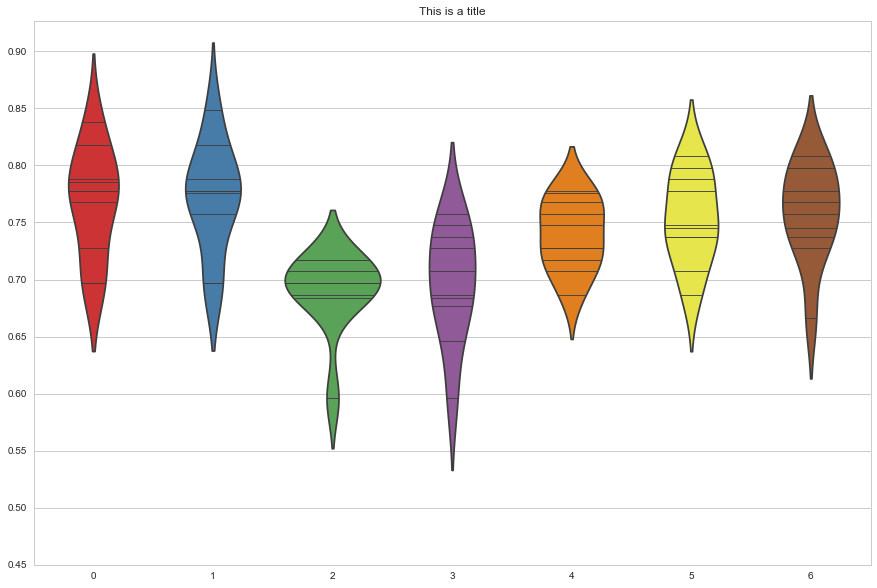

In [29]:
plt.figure(figsize=(15, 10))
plt.title("This is a title")
sns.set_style(style="whitegrid")
g = sns.violinplot(data=results, palette='Set1', inner="stick")
g.set_yticks([0.45, 0.5, 0.55, 0.60, 0.65, 0.70, 0.75, 0.8, 0.85, 0.9])

# "box", "quartile", "point", "stick", None

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


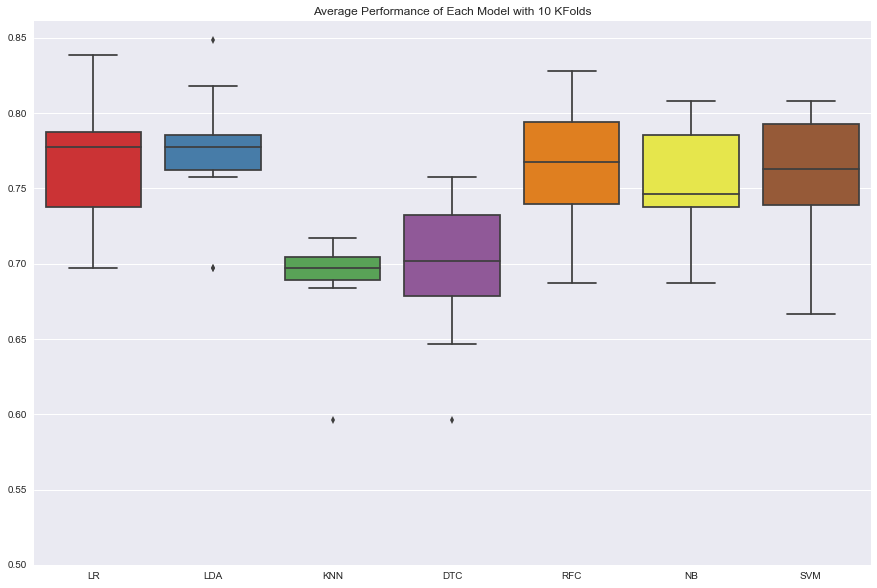

In [104]:
plt.figure(figsize=(15, 10))
plt.title("Average Performance of Each Model with 10 KFolds")
sns.set_style(style="whitegrid")
g = sns.boxplot(data=results, palette='Set1', notch=False)
g.set_yticks([0.5, 0.55, 0.60, 0.65, 0.70, 0.75, 0.8, 0.85])
g.set_xticklabels(['LR','LDA','KNN','DTC','RFC','NB','SVM'])
g.legend()

# "box", "quartile", "point", "stick", None

In [471]:
# Create a pipeline that standardizes the data then creates a model
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# load data
X = predictors
Y = outcome
# create pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('lda', LinearDiscriminantAnalysis()))
model = Pipeline(estimators)
# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.610006349206


In [472]:
# Create a pipeline that extracts features from the data then creates a model
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
# load data
X = predictors
Y = outcome
# create feature union
features = []
features.append(('pca', PCA(n_components=3)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)
# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', LogisticRegression()))
model = Pipeline(estimators)
# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.610006349206


In [473]:
# AdaBoost Classification
X = predictors
Y = outcome
num_trees = 30
seed=7
kfold = KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.644965079365


In [474]:
# Stochastic Gradient Boosting Classification
X = predictors
Y = outcome
seed = 7
num_trees = 100
kfold = KFold(n_splits=10, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed) 
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.64339047619


In [475]:
# Voting Ensemble for Classification
X = predictors
Y = outcome
kfold = KFold(n_splits=10, random_state=7)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

0.63226031746


In [476]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
X = predictors
Y = outcome
alphas = numpy.array([1,0.1,0.01,0.001,0.0001,0])
param_grid = dict(alpha=alphas)
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)
print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.0523475347157
1.0


In [477]:
# Randomized for Algorithm Tuning
import numpy
from pandas import read_csv
from scipy.stats import uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
X = predictors
Y = outcome
param_grid = {'alpha': uniform(), 'tol': uniform()}
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100,
    random_state=7)
rsearch.fit(X, Y)
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)
print(rsearch.best_estimator_.tol)

0.052347123234
0.992557719173
0.241602916654


In [478]:
# Randomized for Algorithm Tuning
import numpy
from pandas import read_csv
from scipy.stats import uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
X = predictors
Y = outcome
param_grid = {'max_iter': [1,2,3,4,5,6,7], 'tol': uniform()}
model = LogisticRegression()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100,
    random_state=7)
rsearch.fit(X, Y)
print(rsearch.best_score_)
print(rsearch.best_estimator_.max_iter)
print(rsearch.best_estimator_.tol)

0.594122319301
5
0.77991879224


In [480]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold) 
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.719000 using {'C': 1.0, 'kernel': 'rbf'}
0.677000 (0.056577) with: {'C': 0.1, 'kernel': 'linear'}
0.637000 (0.049608) with: {'C': 0.1, 'kernel': 'poly'}
0.684000 (0.052192) with: {'C': 0.1, 'kernel': 'rbf'}
0.680000 (0.052154) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.677000 (0.056577) with: {'C': 0.3, 'kernel': 'linear'}
0.676000 (0.034117) with: {'C': 0.3, 'kernel': 'poly'}
0.706000 (0.045431) with: {'C': 0.3, 'kernel': 'rbf'}
0.677000 (0.050606) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.677000 (0.056577) with: {'C': 0.5, 'kernel': 'linear'}
0.677000 (0.036346) with: {'C': 0.5, 'kernel': 'poly'}
0.704000 (0.047582) with: {'C': 0.5, 'kernel': 'rbf'}
0.673000 (0.042438) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.677000 (0.056577) with: {'C': 0.7, 'kernel': 'linear'}
0.680000 (0.043818) with: {'C': 0.7, 'kernel': 'poly'}
0.709000 (0.046357) with: {'C': 0.7, 'kernel': 'rbf'}
0.663000 (0.051585) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.677000 (0.056577) with: {'C': 0.9, 'kernel': 'linear'

20% test size, 10 K-folds
LR: 0.591861 (0.027802)
NB: 0.603723 (0.037003)
SVM: 0.637545 (0.046404)


full data set, 10 K-Folds
LR: 0.602863 (0.042544)
NB: 0.621111 (0.038069)
SVM: 0.646571 (0.035821)


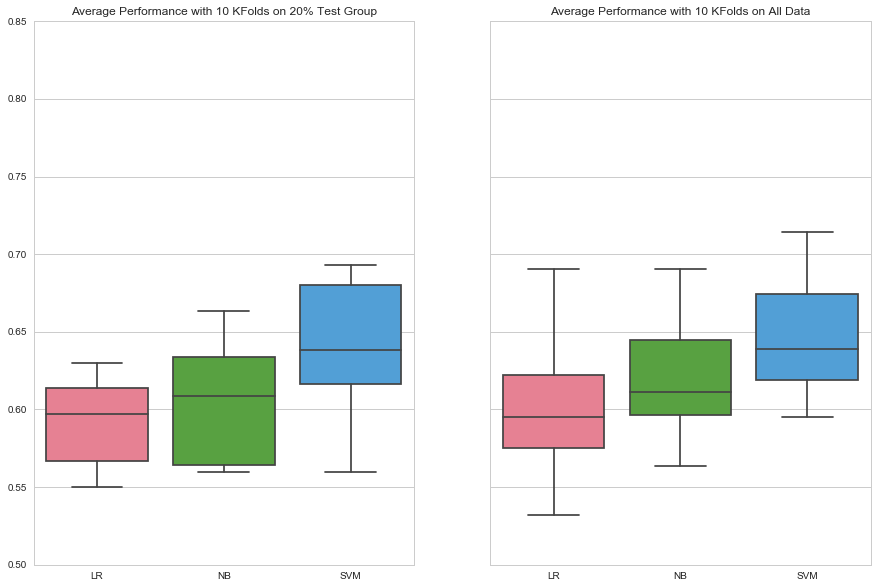

In [219]:
## Testing the tuned model

print('20% test size, 10 K-folds')
num_folds = 10
seed = 7
scoring = 'accuracy'

# Split-out validation dataset
X = predictors
Y = outcome

validation_size = 0.20
seed = 7

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
    test_size=validation_size, random_state=seed)

# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression(max_iter=5, tol=0.01)) l1
1.0
0.01)
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(C=1.0, degree=1, tol=0.001)))

validation_results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  validation_results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
    
print('')
print('')
    
    

print('full data set, 10 K-Folds')
# load dataset
X = predictors
Y = outcome
# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter=5, tol=0.77991879224)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(C=1.0, degree=1, tol=0.001)))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = KFold(n_splits=10, random_state=27)
  cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

    
# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,10))
# f = plt.figure(figsize=(15,10))
sns.set_style(style="whitegrid")
# ax1.title("Average Performance of Each Boosting Model with 10 KFolds on 80% (Training) Data")
sns.boxplot(data=validation_results, palette="husl", ax=ax1)
sns.boxplot(data=results, palette="husl", ax=ax2)



ax1.set_title("Average Performance with 10 KFolds on 20% Test Group")
ax1.set_xticklabels(names)
ax1.set_yticks([0.5, 0.55, 0.60, 0.65, 0.70, 0.75, 0.8, 0.85])
ax2.set_title("Average Performance with 10 KFolds on All Data")
ax2.set_xticklabels(names)
ax2.set_yticks([0.5, 0.55, 0.60, 0.65, 0.70, 0.75, 0.8, 0.85])

In [22]:
names

['LR', 'LDA', 'KNN', 'DTC', 'RFC', 'NB', 'SVM']

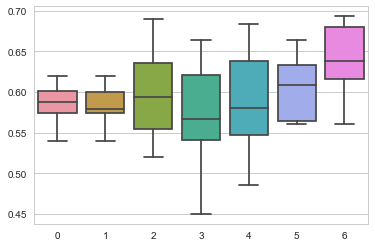

In [23]:
sns.boxplot(data=results)

ScaledLR: 0.583911 (0.021992)
ScaledLDA: 0.583911 (0.021082)
ScaledKNN: 0.616663 (0.044621)
ScaledCART: 0.570861 (0.060114)
ScaledNB: 0.603723 (0.037003)
ScaledSVM: 0.636554 (0.037376)


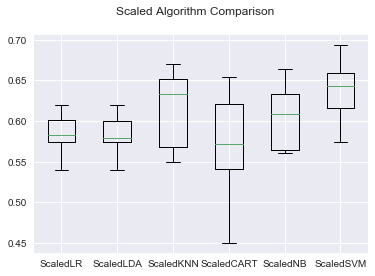

In [496]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',
    LinearDiscriminantAnalysis())])))

pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())]))) 
results = []
names = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
    
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison') 
ax = fig.add_subplot(111) 
pyplot.boxplot(results) 
ax.set_xticklabels(names)
pyplot.show()

In [486]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5)
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.674603174603
[[84 42]
 [40 86]]
             precision    recall  f1-score   support

          0       0.68      0.67      0.67       126
          1       0.67      0.68      0.68       126

avg / total       0.67      0.67      0.67       252

